# Sentiment Analysis of FOMC Statements

Analyse statement by Loughran and McDonald dictionary

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("evironment varialbles:")
eKonf.print(eKonf.env().dict())

INFO:ekorpkit.base:IPython version: (6, 9, 0), client: jupyter_client
INFO:ekorpkit.base:Google Colab not detected.


version: 0.1.33+24.gd2d9e99.dirty
is notebook? True
is colab? False
evironment varialbles:
{'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'NUM_WORKERS': 230}


In [2]:
start_year = 2000
data_dir = "../data/fomc"
eKonf.env().FRED_API_KEY

pydantic.types.SecretStr

## Predict sentiments with the LM sentiment analyser

### Load FOMC Corpus

In [13]:
fomc_sents = eKonf.load_data("fomc_sents.parquet", data_dir)
fomc_sents.tail()

INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sents.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sents.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sents.parquet


,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,recent_meeting,recent_decision,recent_rate,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id
653463,2854,It will not have the word “somewhat” on line 3.,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,10,287,2
653464,2854,Chair Yellen Yes Vice Chairman Dudley ...,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,31,287,4
653465,2854,And let me confirm that the next meeting will ...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,19,288,3
653466,2854,I believe box lunches are now available for pe...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,33,288,4
653467,2854,"I will do my best, and I will consider at the ...",train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,2014-12-17,0.0,0.25,2015-01-28,0.0,0.25,18,288,5


### Predict sentiments of sentences

In [27]:
model_cfg = eKonf.compose('model/sentiment=lm')
model_cfg.num_workers = 100
lmsa = eKonf.instantiate(model_cfg)

INFO:ekorpkit.preprocessors.tokenizer:instantiating ekorpkit.preprocessors.stopwords.Stopwords...
INFO:ekorpkit.base:Calling load_candidates
INFO:ekorpkit.io.file:Processing [1] files from ['/workspace/projects/ekorpkit/ekorpkit/resources/lexicons/LM.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/projects/ekorpkit/ekorpkit/resources/lexicons/LM.parquet']
INFO:ekorpkit.io.file:Loading data from /workspace/projects/ekorpkit/ekorpkit/resources/lexicons/LM.parquet
INFO:ekorpkit.models.ngram.ngram:loaded 58142 candidates


In [28]:
article = fomc_sents.text[10]
lmsa.predict_sentence(article)

{'num_tokens': 156,
 'polarity': -0.9999990000010001,
 'polarity_label': 'negative',
 'uncertainty': 1e-06}

In [29]:
fomc_sent_sentiments = lmsa.predict(fomc_sents)
eKonf.save_data(fomc_sent_sentiments, "fomc_sent_sentiments.parquet", data_dir)

INFO:ekorpkit.models.sentiment.lbsa:Predicting sentiments of the column [text] using predict_sentence
INFO:ekorpkit.base:Using batcher with minibatch size: 1000
INFO:ekorpkit.utils.batch.batcher: backend: joblib  minibatch_size: 1000  procs: 100  input_split: False  merge_output: True  len(data): 653468 len(args): 5
Predicting [text]: 100%|██████████| 654/654 [02:50<00:00,  3.83it/s]
INFO:ekorpkit.models.sentiment.lbsa: >> elapsed time to predict: 0:02:51.902053


,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,...,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id,num_tokens,polarity,polarity_label,uncertainty
0,0,The Secretary reported that advices of the ele...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,47,29,0,52,0.000000,neutral,0.000001
1,0,"By unanimous vote, the Committee elected the f...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,73,35,0,78,-1.000000,negative,0.000001
2,0,"By unanimous vote, William J. McDonough, Marga...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,74,37,0,83,1.000000,positive,0.000001
3,0,"On January 15, 1993, the continuing rules, reg...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,59,39,0,68,-0.333333,negative,0.014707
4,0,Members were asked to indicate if they wished ...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,25,39,1,26,-0.999999,negative,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653463,2854,It will not have the word “somewhat” on line 3.,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,10,287,2,13,0.000000,neutral,0.076924
653464,2854,Chair Yellen Yes Vice Chairman Dudley ...,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,31,287,4,31,0.000000,neutral,0.000001
653465,2854,And let me confirm that the next meeting will ...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,19,288,3,21,0.000000,neutral,0.000001
653466,2854,I believe box lunches are now available for pe...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,33,288,4,39,0.000000,neutral,0.025642


In [30]:
fomc_sent_sentiments = eKonf.load_data("fomc_sent_sentiments.parquet", data_dir)
fomc_sent_sentiments

INFO:ekorpkit.io.file:Saving dataframe to ../data/fomc/fomc_sent_sentiments.parquet
INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sent_sentiments.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sent_sentiments.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sent_sentiments.parquet


,id,text,split,timestamp,content_type,date,speaker,title,decision,rate,...,next_meeting,next_decision,next_rate,text_num_words,section_id,sent_id,num_tokens,polarity,polarity_label,uncertainty
0,0,The Secretary reported that advices of the ele...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,47,29,0,52,0.000000,neutral,0.000001
1,0,"By unanimous vote, the Committee elected the f...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,73,35,0,78,-1.000000,negative,0.000001
2,0,"By unanimous vote, William J. McDonough, Marga...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,74,37,0,83,1.000000,positive,0.000001
3,0,"On January 15, 1993, the continuing rules, reg...",train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,59,39,0,68,-0.333333,negative,0.014707
4,0,Members were asked to indicate if they wished ...,train,1993-02-03,fomc_minutes,1993-02-03,Alan Greenspan,FOMC Meeting Minutes,0.0,3.00,...,1993-02-18,0.0,3.00,25,39,1,26,-0.999999,negative,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653463,2854,It will not have the word “somewhat” on line 3.,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,10,287,2,13,0.000000,neutral,0.076924
653464,2854,Chair Yellen Yes Vice Chairman Dudley ...,train,2014-12-17,fomc_meeting_script,2014-12-17,MR. LUECKE,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,31,287,4,31,0.000000,neutral,0.000001
653465,2854,And let me confirm that the next meeting will ...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,19,288,3,21,0.000000,neutral,0.000001
653466,2854,I believe box lunches are now available for pe...,train,2014-12-17,fomc_meeting_script,2014-12-17,CHAIR YELLEN,FOMC Meeting Transcript,0.0,0.25,...,2015-01-28,0.0,0.25,33,288,4,39,0.000000,neutral,0.025642


### Aggregate sentiment scores

In [98]:
fomc_sentiment_recent = lmsa.aggregate_scores(fomc_sent_sentiments, groupby=['content_type', 'recent_meeting'])
fomc_sentiment_recent.content_type = fomc_sentiment_recent.content_type.str.replace('fomc_', '')
eKonf.save_data(fomc_sentiment_recent, 'fomc_sentiment_recent.parquet', data_dir)
fomc_sentiment_next = lmsa.aggregate_scores(fomc_sent_sentiments, groupby=['content_type', 'next_meeting'])
fomc_sentiment_next.content_type = fomc_sentiment_next.content_type.str.replace('fomc_', '')
eKonf.save_data(fomc_sentiment_next, 'fomc_sentiment_next.parquet', data_dir)

INFO:ekorpkit.io.file:Saving dataframe to ../data/fomc/fomc_sentiment_recent.parquet
INFO:ekorpkit.io.file:Saving dataframe to ../data/fomc/fomc_sentiment_next.parquet


In [99]:
fomc_sentiment_recent = eKonf.load_data('fomc_sentiment_recent.parquet', data_dir)
fomc_sentiment_recent

INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sentiment_recent.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sentiment_recent.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sentiment_recent.parquet


,content_type,recent_meeting,polarity_mean,polarity_diffusion,positive,negative,num_tokens_sum,num_tokens_mean,num_tokens_median,num_examples,polarity_mean_label,polarity_diffusion_label
0,beigebook,2020-12-16,-0.068247,-0.071053,3972,5229,397855,22.489119,21.0,17691,neutral,neutral
1,beigebook,2021-01-27,-0.032683,-0.037384,3887,4518,381300,22.590201,21.0,16879,neutral,neutral
2,beigebook,2021-03-17,-0.030535,-0.035085,3568,4100,340121,22.430983,21.0,15163,neutral,neutral
3,beigebook,2021-04-28,-0.039873,-0.044760,3837,4561,357745,22.117156,21.0,16175,neutral,neutral
4,beigebook,2021-06-16,0.011743,0.012195,191,182,15803,21.413279,21.0,738,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,testimony,2021-03-17,-0.244167,-0.275000,6,28,2478,30.975000,28.5,80,negative,negative
1061,testimony,2021-04-28,-0.171642,-0.164179,15,26,2590,38.656716,29.0,67,negative,negative
1062,testimony,2021-06-16,0.235955,0.247191,34,12,2522,28.337079,26.0,89,positive,positive
1063,testimony,2021-09-22,0.031746,0.000000,9,9,1026,24.428571,22.0,42,neutral,neutral


In [100]:
fomc_sentiment_next = eKonf.load_data('fomc_sentiment_next.parquet', data_dir)
fomc_sentiment_next

INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sentiment_next.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sentiment_next.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sentiment_next.parquet


,content_type,next_meeting,polarity_mean,polarity_diffusion,positive,negative,num_tokens_sum,num_tokens_mean,num_tokens_median,num_examples,polarity_mean_label,polarity_diffusion_label
0,beigebook,2021-01-27,-0.068247,-0.071053,3972,5229,397855,22.489119,21.0,17691,neutral,neutral
1,beigebook,2021-03-17,-0.032683,-0.037384,3887,4518,381300,22.590201,21.0,16879,neutral,neutral
2,beigebook,2021-04-28,-0.030535,-0.035085,3568,4100,340121,22.430983,21.0,15163,neutral,neutral
3,beigebook,2021-06-16,-0.039873,-0.044760,3837,4561,357745,22.117156,21.0,16175,neutral,neutral
4,beigebook,2021-07-28,0.011743,0.012195,191,182,15803,21.413279,21.0,738,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,testimony,2021-04-28,-0.244167,-0.275000,6,28,2478,30.975000,28.5,80,negative,negative
1061,testimony,2021-06-16,-0.171642,-0.164179,15,26,2590,38.656716,29.0,67,negative,negative
1062,testimony,2021-07-28,0.235955,0.247191,34,12,2522,28.337079,26.0,89,positive,positive
1063,testimony,2021-11-03,0.031746,0.000000,9,9,1026,24.428571,22.0,42,neutral,neutral


In [101]:
cfg = eKonf.compose('pipeline/pivot')
cfg.index = 'recent_meeting'
cfg.columns = 'content_type'
cfg.values = ['polarity_mean', 'polarity_diffusion', 'num_examples', 'num_tokens_sum', 'num_tokens_mean']
data_recent = eKonf.pipe(fomc_sentiment_recent, cfg)
data_recent = data_recent.set_index('recent_meeting')
eKonf.save_data(data_recent, 'fomc_sentiment_data_recent.parquet', data_dir)

INFO:ekorpkit.base:Applying pipe: functools.partial(<function pivot at 0x7f0abf86c1f0>)
INFO:ekorpkit.io.file:Saving dataframe to ../data/fomc/fomc_sentiment_data_recent.parquet


In [102]:
data_recent = eKonf.load_data('fomc_sentiment_data_recent.parquet', data_dir)
data_recent

INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sentiment_data_recent.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sentiment_data_recent.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sentiment_data_recent.parquet


,polarity_mean_beigebook,polarity_mean_meeting_script,polarity_mean_minutes,polarity_mean_press_conf,polarity_mean_speech,polarity_mean_statement,polarity_mean_testimony,polarity_diffusion_beigebook,polarity_diffusion_meeting_script,polarity_diffusion_minutes,...,num_tokens_sum_speech,num_tokens_sum_statement,num_tokens_sum_testimony,num_tokens_mean_beigebook,num_tokens_mean_meeting_script,num_tokens_mean_minutes,num_tokens_mean_press_conf,num_tokens_mean_speech,num_tokens_mean_statement,num_tokens_mean_testimony
recent_meeting,,,,,,,,,,,,,,,,,,,,,
1990-02-07,NaN,-0.087583,NaN,NaN,NaN,NaN,NaN,NaN,-0.095663,NaN,...,NaN,NaN,NaN,NaN,30.213010,NaN,NaN,NaN,NaN,NaN
1990-03-27,NaN,-0.171992,NaN,NaN,NaN,NaN,NaN,NaN,-0.179702,NaN,...,NaN,NaN,NaN,NaN,29.846369,NaN,NaN,NaN,NaN,NaN
1990-05-15,NaN,-0.116052,NaN,NaN,NaN,NaN,NaN,NaN,-0.125461,NaN,...,NaN,NaN,NaN,NaN,29.749077,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,-0.114829,NaN,NaN,NaN,NaN,NaN,NaN,-0.117794,NaN,...,NaN,NaN,NaN,NaN,29.667920,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,-0.209552,NaN,NaN,NaN,NaN,NaN,NaN,-0.219403,NaN,...,NaN,NaN,NaN,NaN,31.032836,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,0.011743,NaN,0.041638,-0.017544,-0.031786,0.435897,0.235955,0.012195,NaN,0.031142,...,6894.0,384.0,2522.0,21.413279,NaN,30.615917,27.100000,29.088608,29.538462,28.337079
2021-07-28,-0.120547,NaN,-0.043969,0.021318,-0.042941,0.461538,NaN,-0.134921,NaN,-0.069079,...,13170.0,399.0,NaN,20.980159,NaN,32.888158,27.261628,29.072848,30.692308,NaN
2021-09-22,-0.074328,NaN,-0.079199,-0.087292,-0.133837,0.476190,0.031746,-0.075712,NaN,-0.112403,...,31138.0,419.0,1026.0,22.957808,NaN,31.348837,25.809384,29.431002,29.928571,24.428571


In [103]:
cfg = eKonf.compose('pipeline/pivot')
cfg.index = 'next_meeting'
cfg.columns = 'content_type'
cfg.values = ['polarity_mean', 'polarity_diffusion', 'num_examples', 'num_tokens_sum', 'num_tokens_mean']
data_next = eKonf.pipe(fomc_sentiment_next, cfg)
data_next = data_next.set_index('next_meeting')
eKonf.save_data(data_next, 'fomc_sentiment_data_next.parquet', data_dir)

INFO:ekorpkit.base:Applying pipe: functools.partial(<function pivot at 0x7f0abf86c1f0>)
INFO:ekorpkit.io.file:Saving dataframe to ../data/fomc/fomc_sentiment_data_next.parquet


In [104]:
data_next = eKonf.load_data('fomc_sentiment_data_next.parquet', data_dir)
data_next

INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sentiment_data_next.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sentiment_data_next.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sentiment_data_next.parquet


,polarity_mean_beigebook,polarity_mean_meeting_script,polarity_mean_minutes,polarity_mean_press_conf,polarity_mean_speech,polarity_mean_statement,polarity_mean_testimony,polarity_diffusion_beigebook,polarity_diffusion_meeting_script,polarity_diffusion_minutes,...,num_tokens_sum_speech,num_tokens_sum_statement,num_tokens_sum_testimony,num_tokens_mean_beigebook,num_tokens_mean_meeting_script,num_tokens_mean_minutes,num_tokens_mean_press_conf,num_tokens_mean_speech,num_tokens_mean_statement,num_tokens_mean_testimony
next_meeting,,,,,,,,,,,,,,,,,,,,,
1990-03-27,NaN,-0.087583,NaN,NaN,NaN,NaN,NaN,NaN,-0.095663,NaN,...,NaN,NaN,NaN,NaN,30.213010,NaN,NaN,NaN,NaN,NaN
1990-04-11,NaN,-0.171992,NaN,NaN,NaN,NaN,NaN,NaN,-0.179702,NaN,...,NaN,NaN,NaN,NaN,29.846369,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,-0.116052,NaN,NaN,NaN,NaN,NaN,NaN,-0.125461,NaN,...,NaN,NaN,NaN,NaN,29.749077,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,-0.114829,NaN,NaN,NaN,NaN,NaN,NaN,-0.117794,NaN,...,NaN,NaN,NaN,NaN,29.667920,NaN,NaN,NaN,NaN,NaN
1990-09-07,NaN,-0.209552,NaN,NaN,NaN,NaN,NaN,NaN,-0.219403,NaN,...,NaN,NaN,NaN,NaN,31.032836,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28,0.011743,NaN,0.041638,-0.017544,-0.031786,0.435897,0.235955,0.012195,NaN,0.031142,...,6894.0,384.0,2522.0,21.413279,NaN,30.615917,27.100000,29.088608,29.538462,28.337079
2021-09-22,-0.120547,NaN,-0.043969,0.021318,-0.042941,0.461538,NaN,-0.134921,NaN,-0.069079,...,13170.0,399.0,NaN,20.980159,NaN,32.888158,27.261628,29.072848,30.692308,NaN
2021-11-03,-0.074328,NaN,-0.079199,-0.087292,-0.133837,0.476190,0.031746,-0.075712,NaN,-0.112403,...,31138.0,419.0,1026.0,22.957808,NaN,31.348837,25.809384,29.431002,29.928571,24.428571


## Predict sentiments and aggregate scores with a pipeline

In [37]:
model_cfg = eKonf.compose('model/sentiment=lm')

cfg = eKonf.compose('pipeline')
cfg._pipeline_ = ['predict', 'aggregate_scores', 'replace', 'pivot', 'save_dataframe']
cfg.num_workers = 100
cfg.data.data_file = "fomc_sents.parquet"
cfg.data.data_dir = data_dir
cfg.predict.model = model_cfg
cfg.predict.path.output.base_dir = data_dir
cfg.predict.path.output.filename = "fomc_sent_sentiments.parquet"
cfg.aggregate_scores.groupby = ['content_type', 'recent_meeting']
cfg.replace.apply_to = 'content_type'
cfg.replace.rcParams.to_replace = {'fomc_': ''}
cfg.replace.rcParams.regex = True
cfg.pivot.index = 'recent_meeting'
cfg.pivot.columns = 'content_type'
cfg.pivot.values = ['polarity_mean', 'polarity_diffusion', 'num_examples', 'num_tokens_sum', 'num_tokens_mean']
cfg.save_dataframe.output_dir = data_dir
cfg.save_dataframe.output_file = 'fomc_sentiment_data_recent.parquet'
data_recent = eKonf.instantiate(cfg)
data_recent = data_reecnt.set_index('recent_meeting')
data_recent

INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sents.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sents.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sents.parquet
INFO:ekorpkit.pipelines.pipe:Applying pipeline: OrderedDict([('predict', 'predict'), ('aggregate_scores', 'aggregate_scores'), ('replace', 'replace'), ('pivot', 'pivot'), ('save_dataframe', 'save_dataframe')])
INFO:ekorpkit.base:Applying pipe: functools.partial(<function predict at 0x7f0abf86c820>)
INFO:ekorpkit.preprocessors.tokenizer:instantiating ekorpkit.preprocessors.stopwords.Stopwords...
INFO:ekorpkit.base:Calling load_candidates
INFO:ekorpkit.io.file:Processing [1] files from ['/workspace/projects/ekorpkit/ekorpkit/resources/lexicons/LM.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/projects/ekorpkit/ekorpkit/resources/lexicons/LM.parquet']
INFO:ekorpkit.io.file:Loading data from /workspace/projects/ekorpkit/ekorpkit/resources/lexi

,polarity_mean_beigebook,polarity_mean_meeting_script,polarity_mean_minutes,polarity_mean_press_conf,polarity_mean_speech,polarity_mean_statement,polarity_mean_testimony,polarity_diffusion_beigebook,polarity_diffusion_meeting_script,polarity_diffusion_minutes,...,num_tokens_sum_speech,num_tokens_sum_statement,num_tokens_sum_testimony,num_tokens_mean_beigebook,num_tokens_mean_meeting_script,num_tokens_mean_minutes,num_tokens_mean_press_conf,num_tokens_mean_speech,num_tokens_mean_statement,num_tokens_mean_testimony
recent_meeting,,,,,,,,,,,,,,,,,,,,,
1990-02-07,NaN,-0.087583,NaN,NaN,NaN,NaN,NaN,NaN,-0.095663,NaN,...,NaN,NaN,NaN,NaN,30.213010,NaN,NaN,NaN,NaN,NaN
1990-03-27,NaN,-0.171992,NaN,NaN,NaN,NaN,NaN,NaN,-0.179702,NaN,...,NaN,NaN,NaN,NaN,29.846369,NaN,NaN,NaN,NaN,NaN
1990-05-15,NaN,-0.116052,NaN,NaN,NaN,NaN,NaN,NaN,-0.125461,NaN,...,NaN,NaN,NaN,NaN,29.749077,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,-0.114829,NaN,NaN,NaN,NaN,NaN,NaN,-0.117794,NaN,...,NaN,NaN,NaN,NaN,29.667920,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,-0.209552,NaN,NaN,NaN,NaN,NaN,NaN,-0.219403,NaN,...,NaN,NaN,NaN,NaN,31.032836,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16,0.011743,NaN,0.041638,-0.017544,-0.031786,0.435897,0.235955,0.012195,NaN,0.031142,...,6894.0,384.0,2522.0,21.413279,NaN,30.615917,27.100000,29.088608,29.538462,28.337079
2021-07-28,-0.120547,NaN,-0.043969,0.021318,-0.042941,0.461538,NaN,-0.134921,NaN,-0.069079,...,13170.0,399.0,NaN,20.980159,NaN,32.888158,27.261628,29.072848,30.692308,NaN
2021-09-22,-0.074328,NaN,-0.079199,-0.087292,-0.133837,0.476190,0.031746,-0.075712,NaN,-0.112403,...,31138.0,419.0,1026.0,22.957808,NaN,31.348837,25.809384,29.431002,29.928571,24.428571


In [108]:
cfg = eKonf.compose('pipeline')
cfg._pipeline_ = ['aggregate_scores', 'replace', 'pivot', 'save_dataframe']
cfg.num_workers = 100
cfg.data.data_file = "fomc_sent_sentiments.parquet"
cfg.data.data_dir = data_dir
cfg.aggregate_scores.groupby = ['content_type', 'next_meeting']
cfg.replace.apply_to = 'content_type'
cfg.replace.rcParams.to_replace = {'fomc_': ''}
cfg.replace.rcParams.regex = True
cfg.pivot.index = 'next_meeting'
cfg.pivot.columns = 'content_type'
cfg.pivot.values = ['polarity_mean', 'polarity_diffusion', 'num_examples', 'num_tokens_sum', 'num_tokens_mean']
cfg.save_dataframe.output_dir = data_dir
cfg.save_dataframe.output_file = 'fomc_sentiment_data_next.parquet'
data_next = eKonf.instantiate(cfg)
data_next = data_next.set_index('next_meeting')
data_next

INFO:ekorpkit.io.file:Processing [1] files from ['fomc_sent_sentiments.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_sent_sentiments.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_sent_sentiments.parquet
INFO:ekorpkit.pipelines.pipe:Applying pipeline: OrderedDict([('aggregate_scores', 'aggregate_scores'), ('replace', 'replace'), ('pivot', 'pivot'), ('save_dataframe', 'save_dataframe')])
INFO:ekorpkit.base:Applying pipe: functools.partial(<function aggregate_scores at 0x7f0abf86c8b0>)
INFO:ekorpkit.base:instantiating ekorpkit.models.sentiment.base.BaseSentimentAnalyser...
INFO:ekorpkit.pipelines.pipe:filename not specified
INFO:ekorpkit.base:Applying pipe: functools.partial(<function general_function at 0x7f0abf86cc10>)
INFO:ekorpkit.pipelines.pipe:processing column: content_type
INFO:ekorpkit.pipelines.pipe: >> elapsed time to replace: 0:00:00.003589
INFO:ekorpkit.base:Applying pipe: functools.partial(<function pivot at 0x7f0abf86c1f

,polarity_mean_beigebook,polarity_mean_meeting_script,polarity_mean_minutes,polarity_mean_press_conf,polarity_mean_speech,polarity_mean_statement,polarity_mean_testimony,polarity_diffusion_beigebook,polarity_diffusion_meeting_script,polarity_diffusion_minutes,...,num_tokens_sum_speech,num_tokens_sum_statement,num_tokens_sum_testimony,num_tokens_mean_beigebook,num_tokens_mean_meeting_script,num_tokens_mean_minutes,num_tokens_mean_press_conf,num_tokens_mean_speech,num_tokens_mean_statement,num_tokens_mean_testimony
next_meeting,,,,,,,,,,,,,,,,,,,,,
1990-03-27,NaN,-0.087583,NaN,NaN,NaN,NaN,NaN,NaN,-0.095663,NaN,...,NaN,NaN,NaN,NaN,30.213010,NaN,NaN,NaN,NaN,NaN
1990-04-11,NaN,-0.171992,NaN,NaN,NaN,NaN,NaN,NaN,-0.179702,NaN,...,NaN,NaN,NaN,NaN,29.846369,NaN,NaN,NaN,NaN,NaN
1990-07-03,NaN,-0.116052,NaN,NaN,NaN,NaN,NaN,NaN,-0.125461,NaN,...,NaN,NaN,NaN,NaN,29.749077,NaN,NaN,NaN,NaN,NaN
1990-08-21,NaN,-0.114829,NaN,NaN,NaN,NaN,NaN,NaN,-0.117794,NaN,...,NaN,NaN,NaN,NaN,29.667920,NaN,NaN,NaN,NaN,NaN
1990-09-07,NaN,-0.209552,NaN,NaN,NaN,NaN,NaN,NaN,-0.219403,NaN,...,NaN,NaN,NaN,NaN,31.032836,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28,0.011743,NaN,0.041638,-0.017544,-0.031786,0.435897,0.235955,0.012195,NaN,0.031142,...,6894.0,384.0,2522.0,21.413279,NaN,30.615917,27.100000,29.088608,29.538462,28.337079
2021-09-22,-0.120547,NaN,-0.043969,0.021318,-0.042941,0.461538,NaN,-0.134921,NaN,-0.069079,...,13170.0,399.0,NaN,20.980159,NaN,32.888158,27.261628,29.072848,30.692308,NaN
2021-11-03,-0.074328,NaN,-0.079199,-0.087292,-0.133837,0.476190,0.031746,-0.075712,NaN,-0.112403,...,31138.0,419.0,1026.0,22.957808,NaN,31.348837,25.809384,29.431002,29.928571,24.428571


## Correlation

In [52]:
cfg = eKonf.compose("io/fetcher/fomc")
cfg.output_dir = data_dir
fomc = eKonf.instantiate(cfg)

INFO:ekorpkit.io.fetch.fomc.base:Initializing fomc_base


In [53]:
fomc.load_calendar(from_year=1982, force_download=False)

INFO:ekorpkit.io.fetch.fomc.base:Loading calendar from cache...
INFO:ekorpkit.io.file:Processing [1] files from ['../data/fomc/fomc_calendar.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/fomc_calendar.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/fomc_calendar.parquet


,unscheduled,forecast,confcall,speaker,rate,rate_change,rate_decision,rate_changed
date,,,,,,,,
1982-10-05,False,False,False,Paul Volcker,9.50,-0.50,-1.0,1
1982-11-16,False,False,False,Paul Volcker,9.00,-0.50,-1.0,1
1982-12-21,False,False,False,Paul Volcker,8.50,0.00,0.0,0
1983-01-14,False,False,True,Paul Volcker,8.50,0.00,0.0,0
1983-01-21,False,False,True,Paul Volcker,8.50,0.00,0.0,0
...,...,...,...,...,...,...,...,...
2021-11-03,False,False,False,Jerome Powell,0.25,0.00,0.0,0
2021-12-15,False,True,False,Jerome Powell,0.25,0.00,0.0,0
2022-01-26,False,False,False,Jerome Powell,0.25,0.00,0.0,0


### Merge with fed rate data

INFO:ekorpkit.base:Applying pipe: functools.partial(<function eval_columns at 0x7f0abf709ee0>)
INFO:ekorpkit.base:Applying pipe: functools.partial(<function eval_columns at 0x7f0abf709ee0>)
INFO:ekorpkit.io.file:Saving dataframe to /workspace/.tmp/fred/DFEDTAR.parquet
INFO:ekorpkit.visualize.plot:Plotting lineplot with {'x': 'date', 'y': 'DFEDTAR', 'linewidth': 2, 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/outputs/figs/LinePlot.png


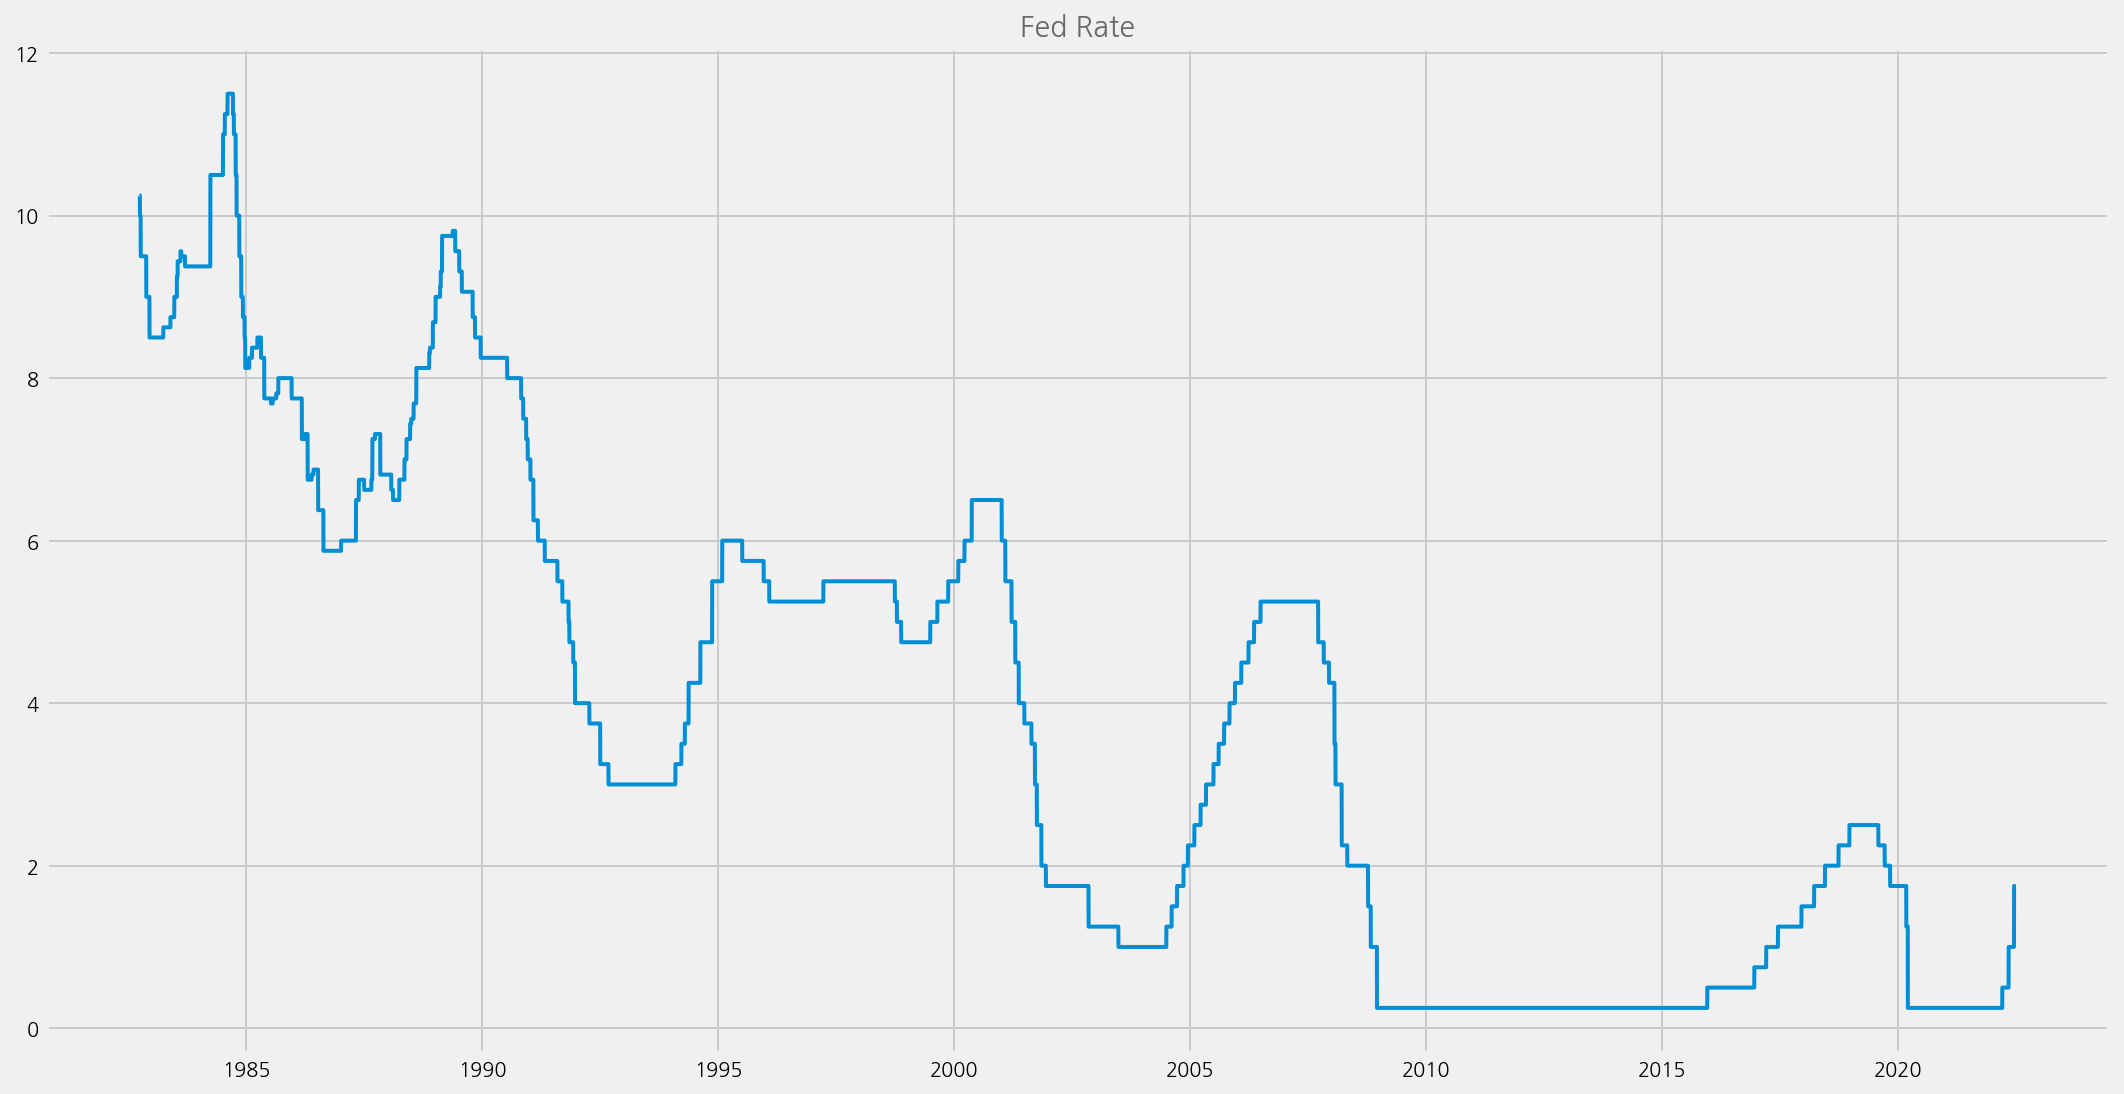

In [40]:
cfg = eKonf.compose("io/fetcher=quandl")
cfg.series_name = "DFEDTAR"
cfg.series_id = ["DFEDTAR", "DFEDTARU"]
cfg.force_download = True
quandl = eKonf.instantiate(cfg)

fedrates = quandl.data.copy()

cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.x = 'date'
cfg.plot.y = 'DFEDTAR'
cfg.figure.figsize = (15, 8)
cfg.ax.title = 'Fed Rate'
eKonf.instantiate(cfg, data=fedrates)

In [109]:
merged_data_recent = data_recent.merge(fomc.calendar, left_index=True, right_index=True)
merged_data_recent.index.name = 'timestamp'
merged_data_recent = merged_data_recent[merged_data_recent.index.year >= start_year]

merged_data_next = data_next.merge(fomc.calendar, left_index=True, right_index=True)
merged_data_next.index.name = 'timestamp'
merged_data_next = merged_data_next[merged_data_next.index.year >= start_year]

In [110]:
corr_columns = [
    'polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement',
    'polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement',
    "rate", "rate_change", "rate_decision"
]

corr_data_recent = merged_data_recent[corr_columns].astype(float).corr()
corr_data_next = merged_data_next[corr_columns].astype(float).corr()


INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/outputs/figs/HeatMap.png


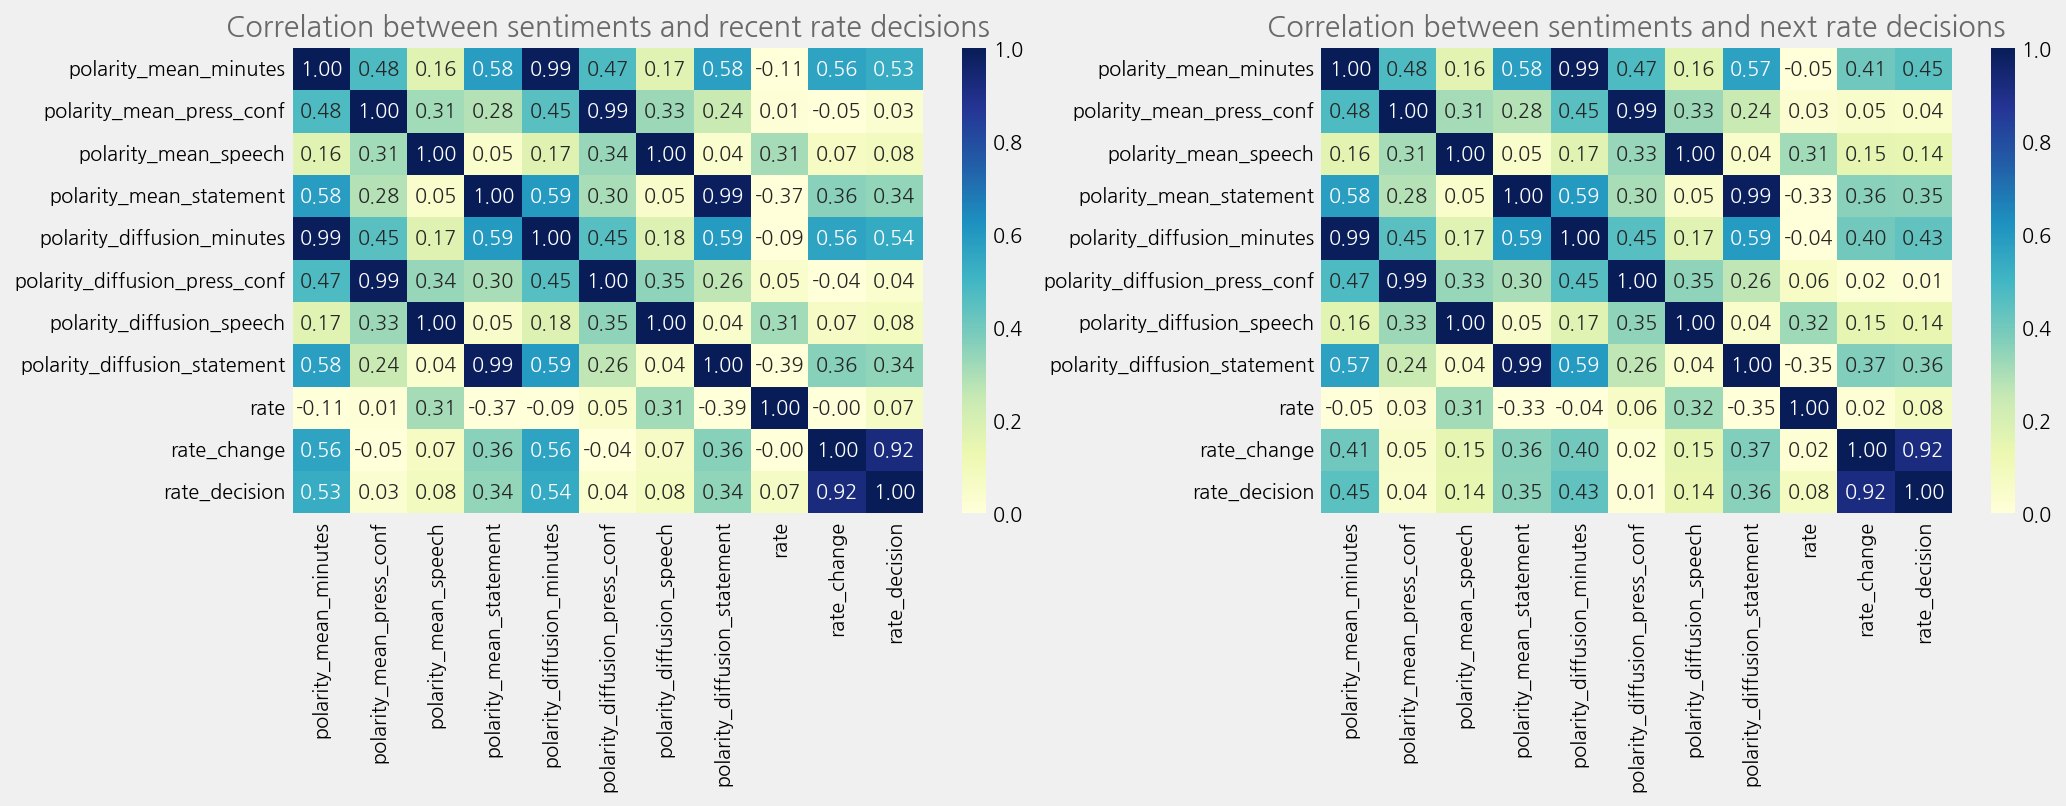

In [111]:
cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (15, 6)
cfg.subplots.ncols = 2
cfg.subplots.nrows = 1
cfg.heatmap.axno = 0
cfg.heatmap.datano = 0
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation between sentiments and recent rate decisions"
cfg.ax.axno = 0
heatmap2 = cfg.heatmap.copy()
heatmap2.axno = 1
heatmap2.datano = 1
ax2 = cfg.ax.copy()
ax2.title = "Correlation between sentiments and next rate decisions"
ax2.axno = 1
cfg.plots.append(heatmap2)
cfg.axes.append(ax2)
eKonf.instantiate(cfg, data=[corr_data_recent, corr_data_next])

INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/outputs/figs/HeatMap.png


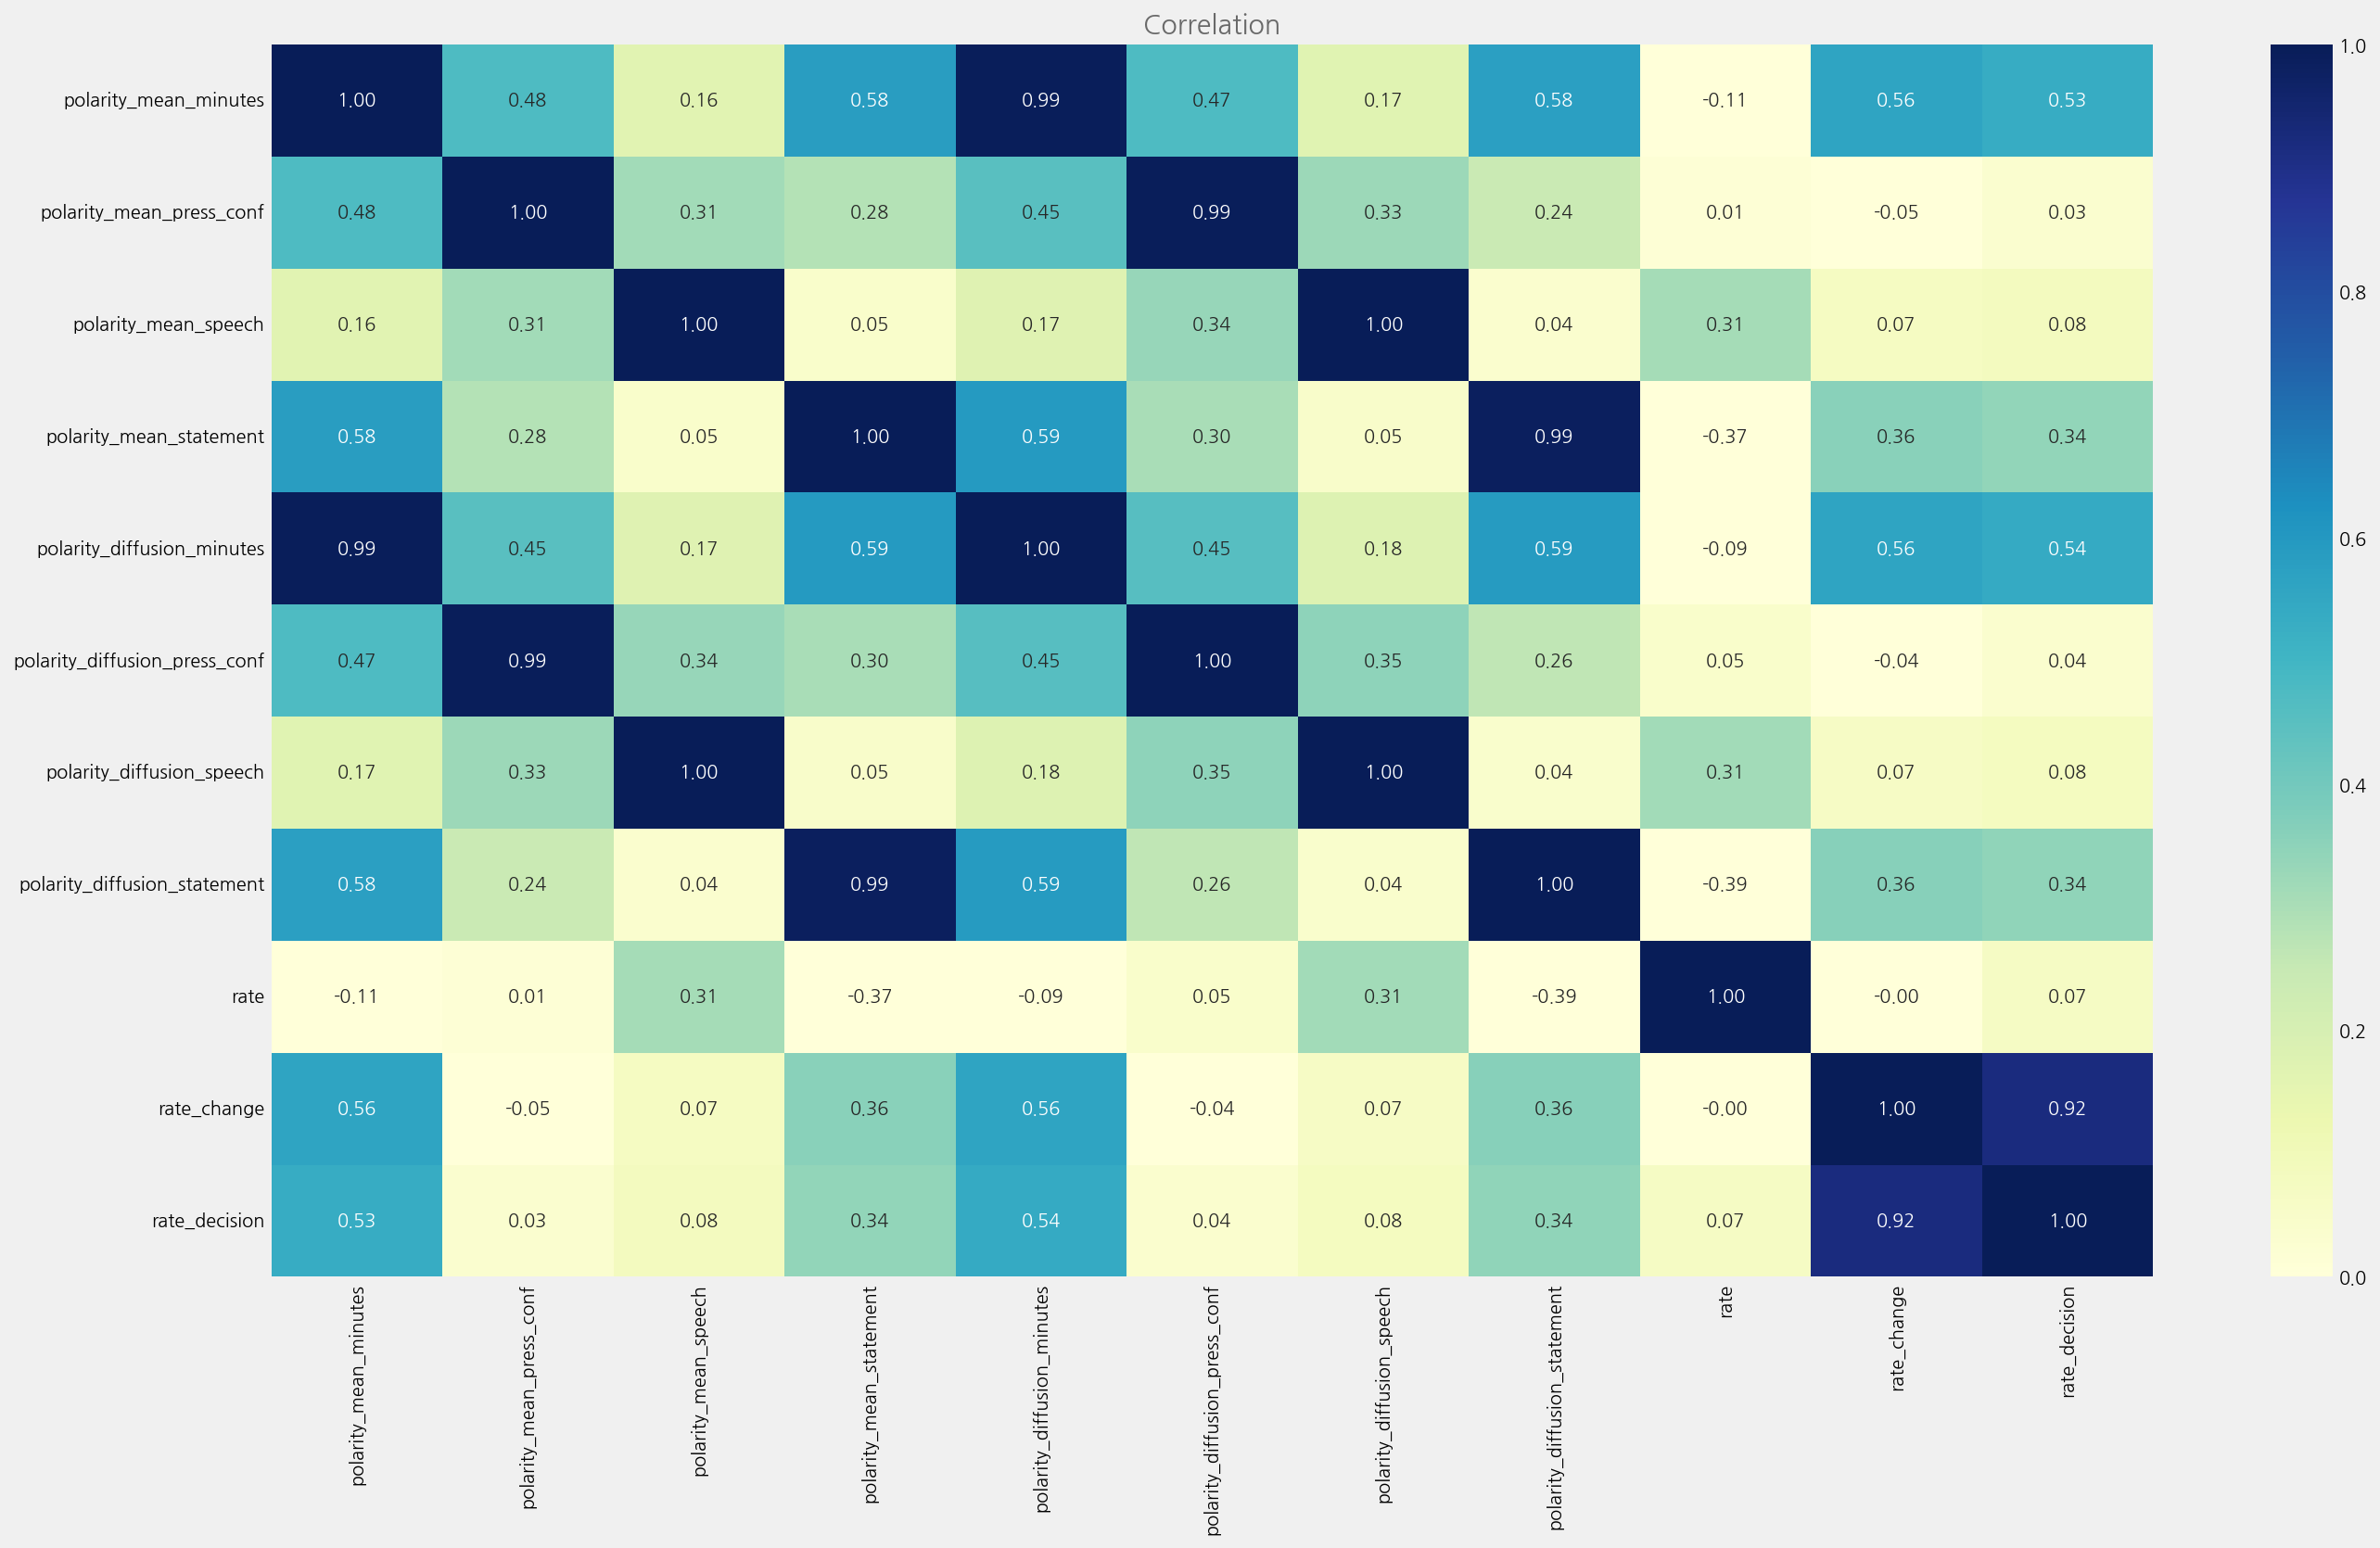

In [89]:
cfg = eKonf.compose("visualize/plot=heatmap")
cfg.figure.figsize = (20, 12)
cfg.heatmap.cmap = "YlGnBu"
cfg.heatmap.vmin = 0
cfg.heatmap.vmax = 1
cfg.heatmap.fmt = ".2f"
cfg.ax.title = "Correlation"
eKonf.instantiate(cfg, data=corr_data_recent)

## Plot the sentiment scores

INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/outputs/figs/LinePlot.png


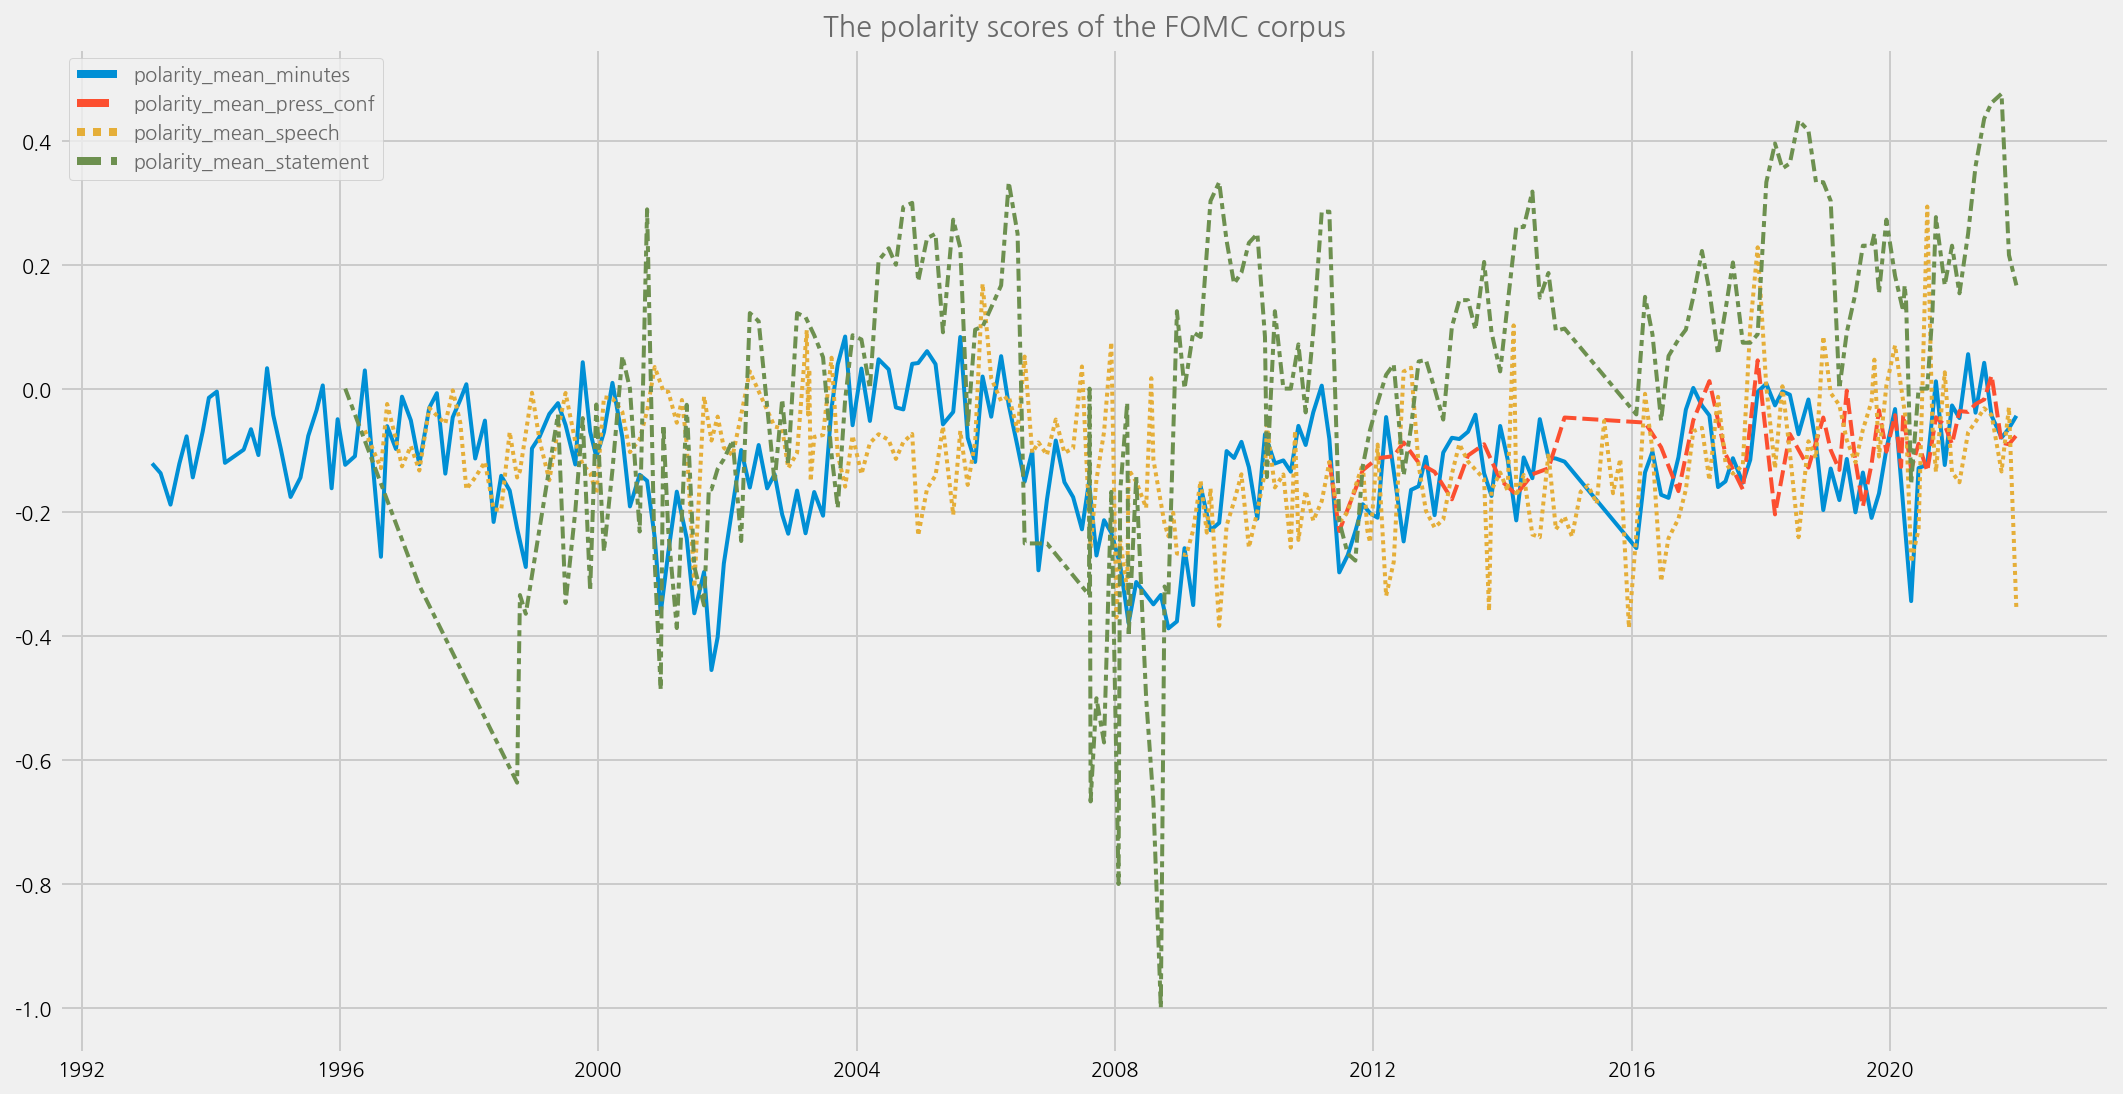

In [112]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_mean_minutes', 'polarity_mean_press_conf', 'polarity_mean_speech', 'polarity_mean_statement']
cfg.figure.figsize = '(15, 8)'
cfg.ax.title = 'The polarity scores of the FOMC corpus'
eKonf.instantiate(cfg, data=data_recent)

INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/outputs/figs/LinePlot.png


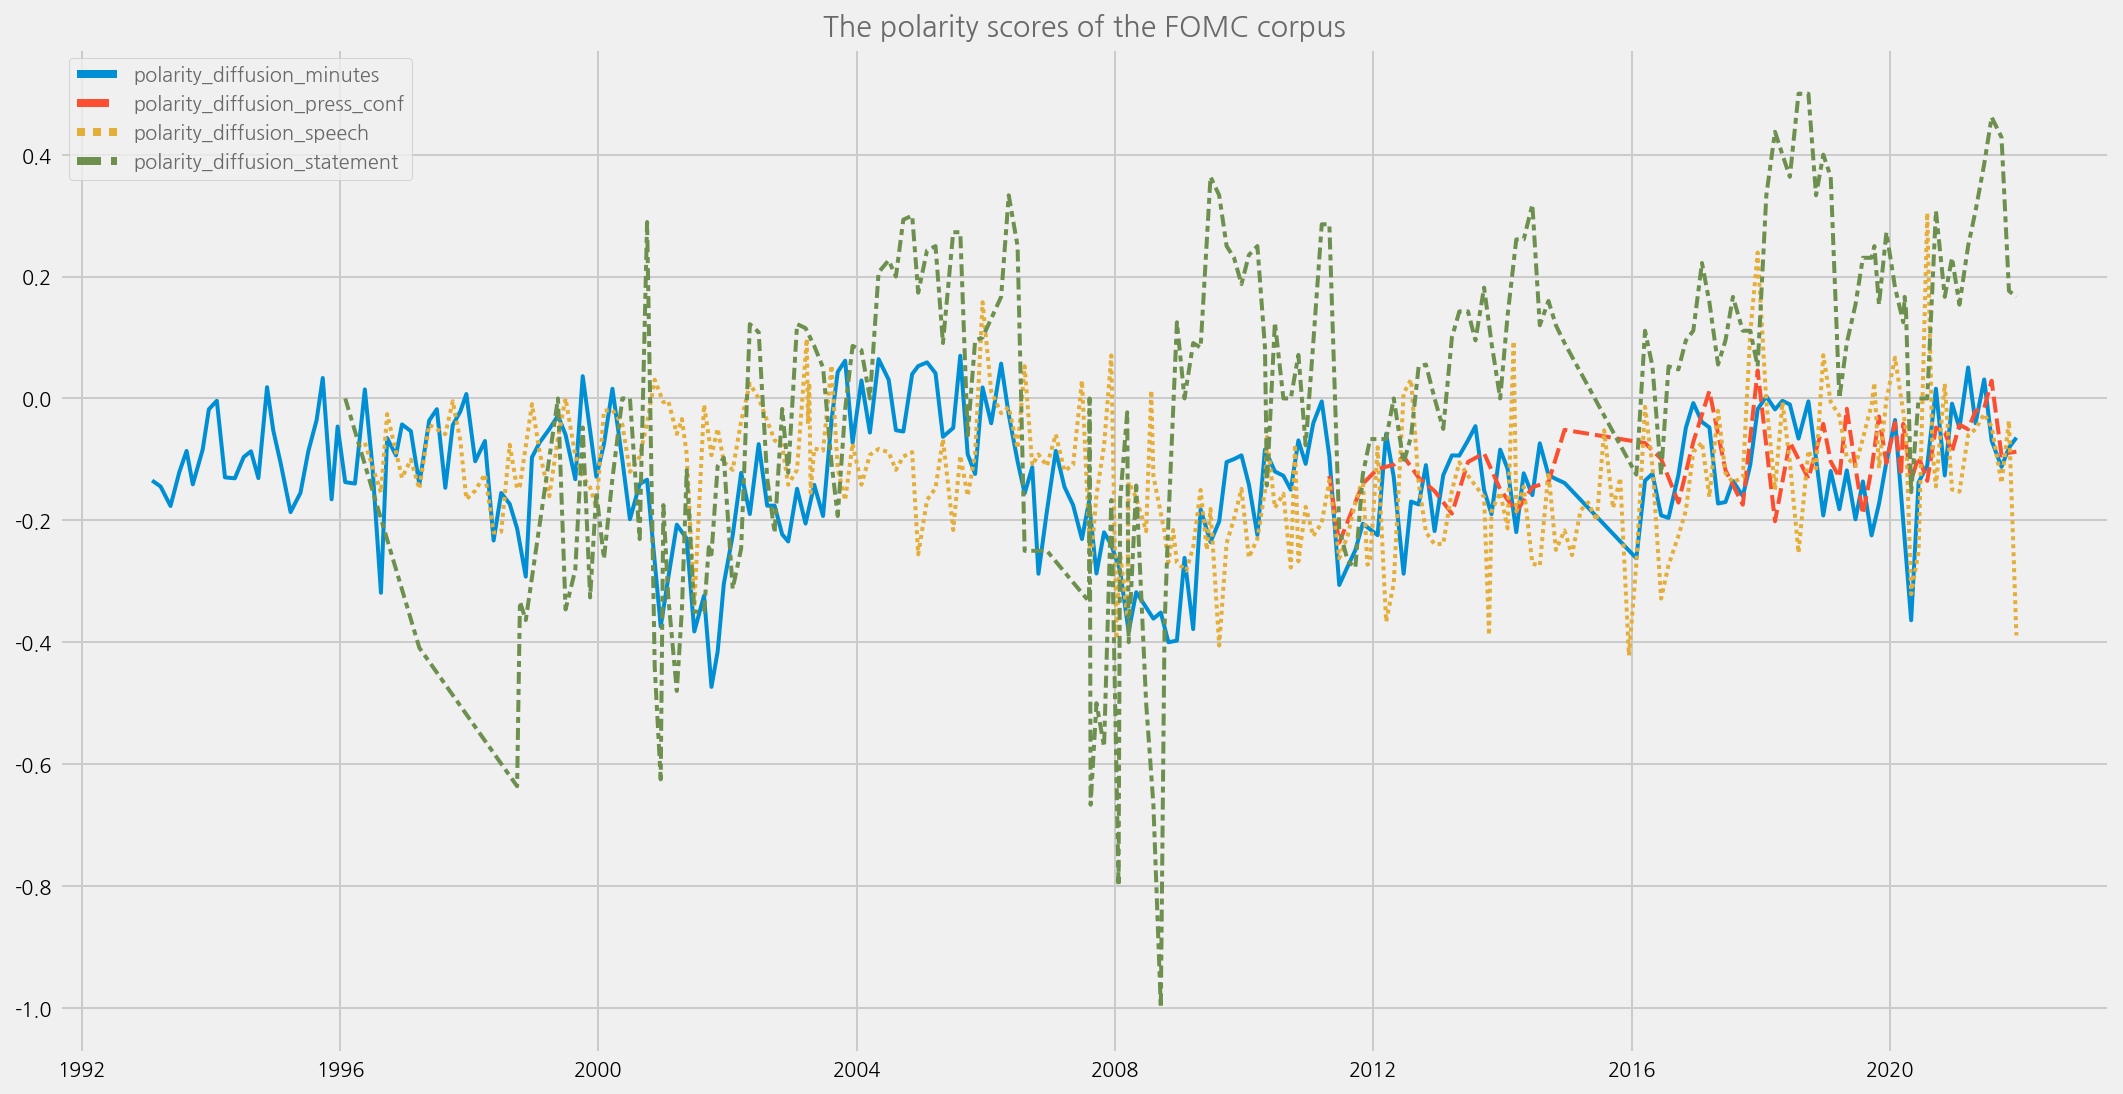

In [113]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_diffusion_minutes', 'polarity_diffusion_press_conf', 'polarity_diffusion_speech', 'polarity_diffusion_statement']
cfg.figure.figsize = '(15, 8)'
cfg.ax.title = 'The polarity scores of the FOMC corpus'
eKonf.instantiate(cfg, data=data_recent)

INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/outputs/figs/LinePlot.png


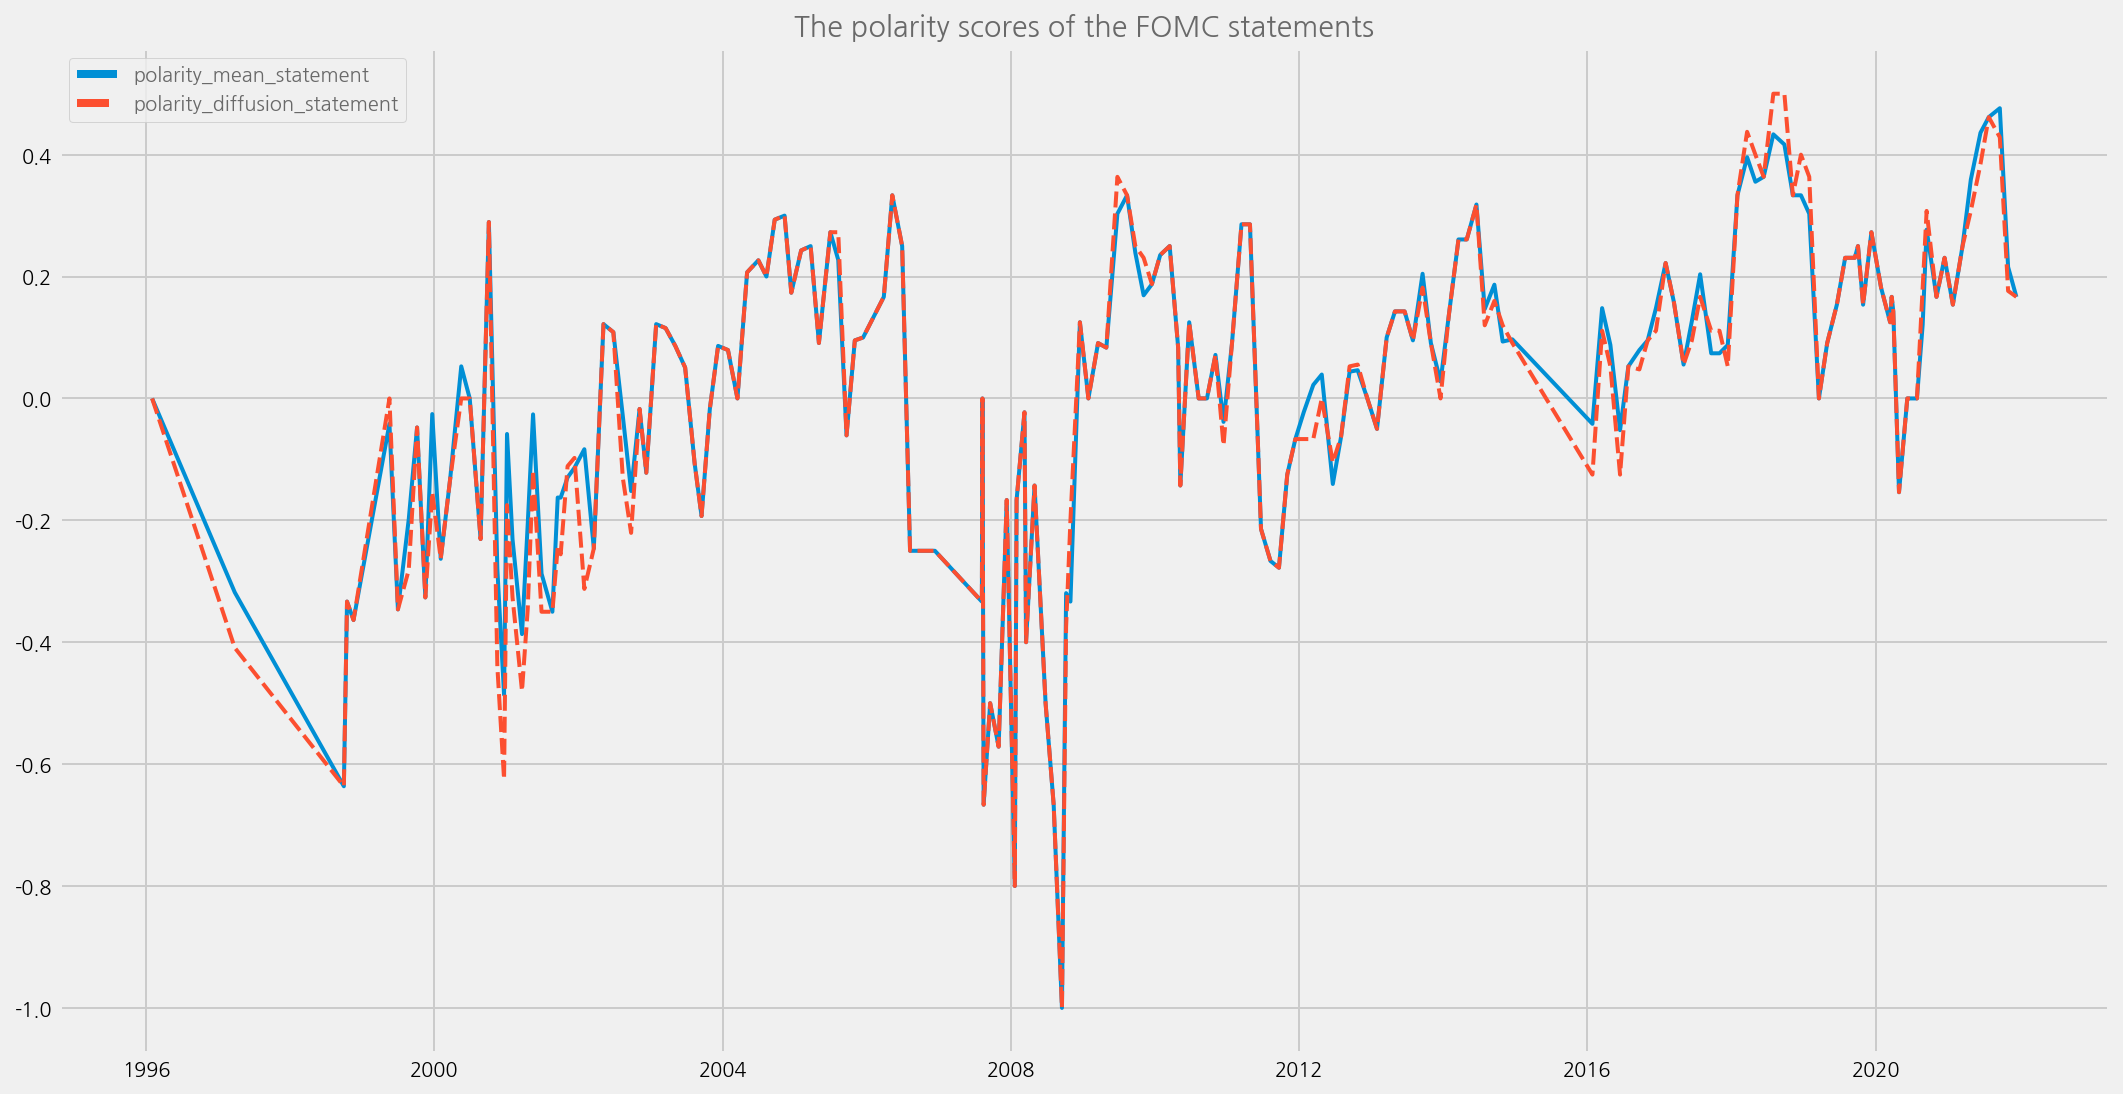

In [114]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.plot.y = ['polarity_mean_statement', 'polarity_diffusion_statement']
cfg.figure.figsize = '(15, 8)'
cfg.ax.title = 'The polarity scores of the FOMC statements'
eKonf.instantiate(cfg, data=data_recent)

INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'color': 'red', 'x': 'recent_meeting', 'y': 'num_tokens_sum_statement', 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.plot:Creating secondary axis to axis[0]
INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'color': 'green', 'x': 'recent_meeting', 'y': 'num_examples_statement', 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort

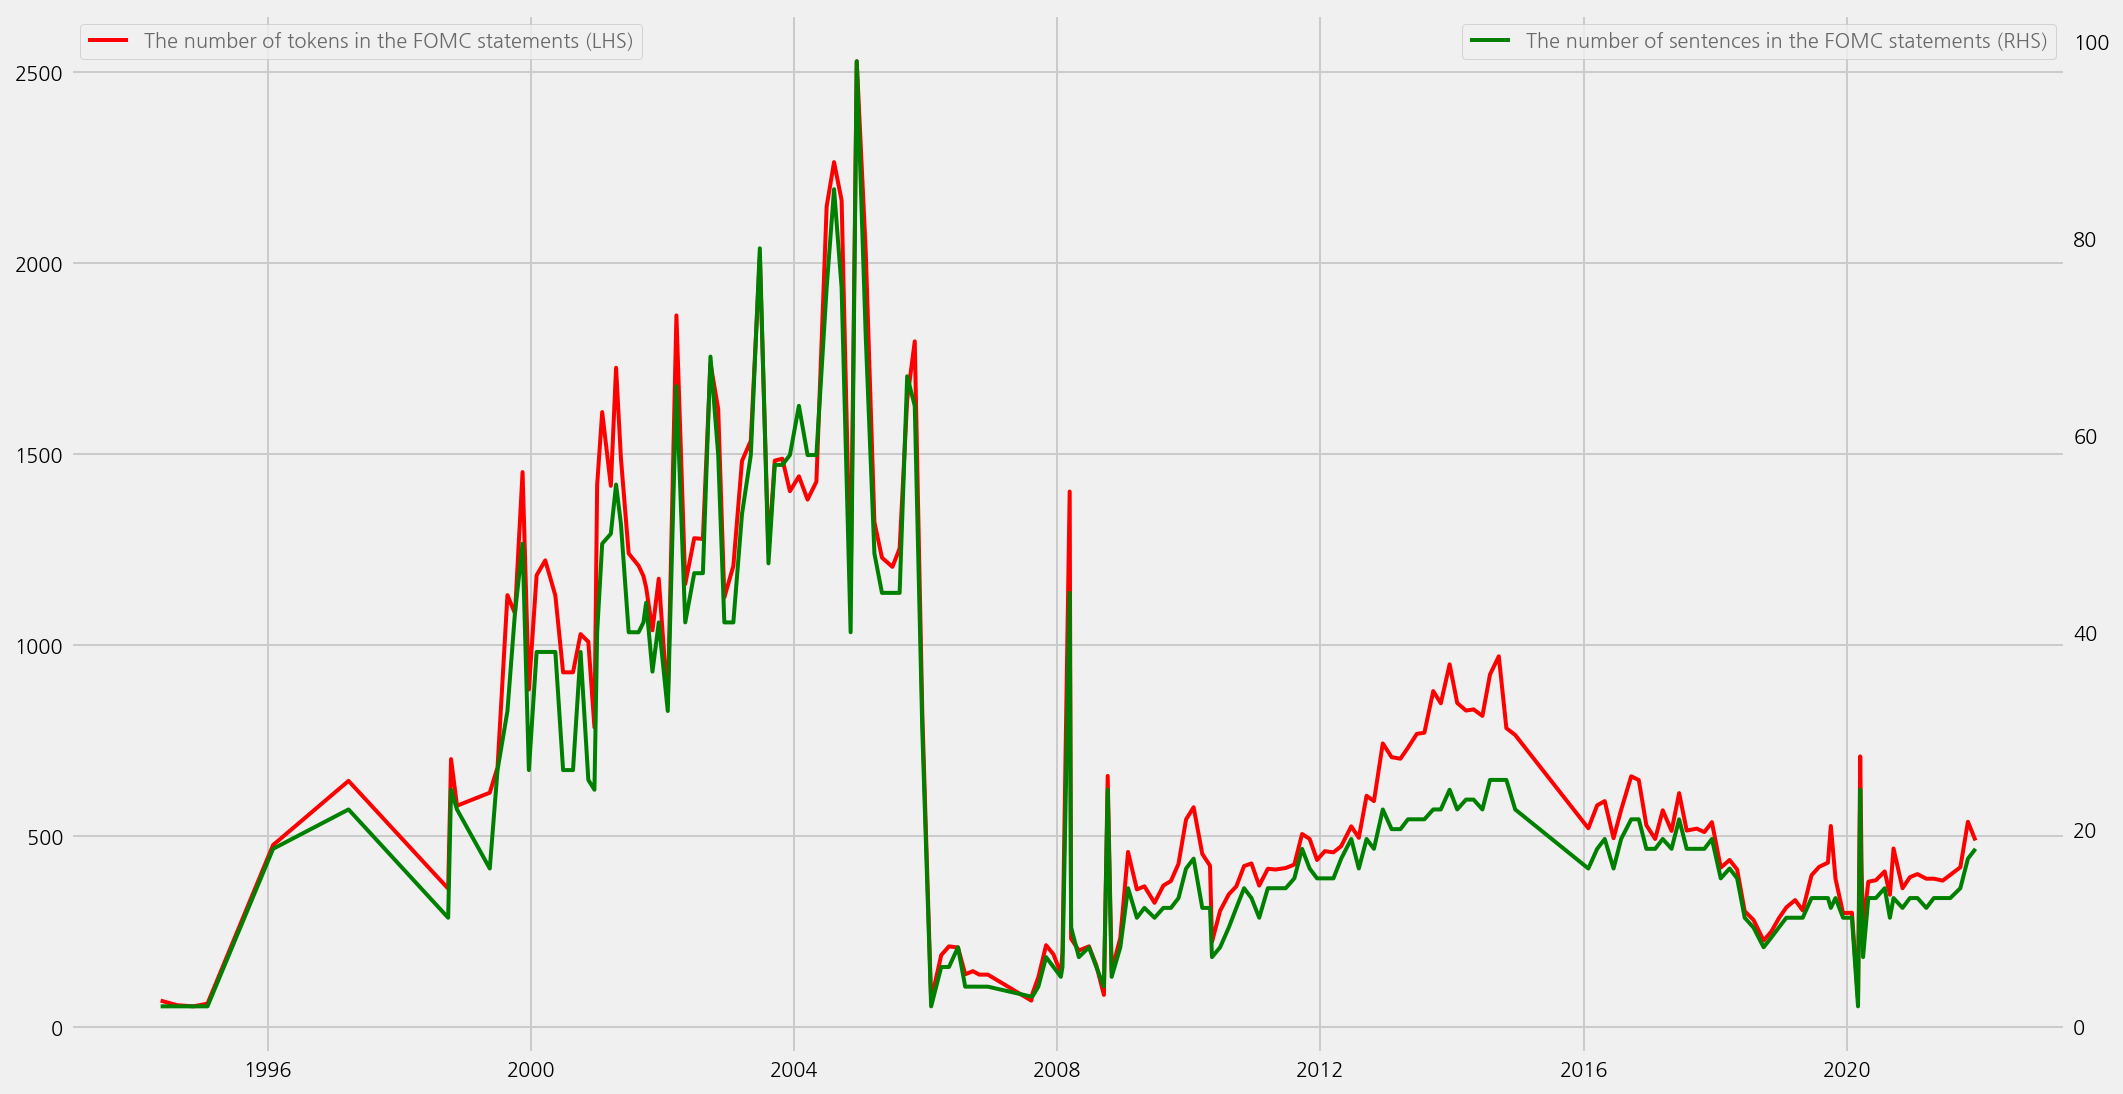

In [115]:
cfg = eKonf.compose('visualize/plot=lineplot')
cfg.figure.figsize = (15, 8)
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "num_tokens_sum_statement"
cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
cfg.plots[1].y = "num_examples_statement"
cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
cfg.plots[1].secondary_y = True
cfg.ax.legend = dict(
    labels=[
        "The number of tokens in the FOMC statements (LHS)",
    ],
    loc=2,
)
ax2 = cfg.ax.copy()
ax2.grid = False
ax2.secondary_y = True
ax2.legend = dict(
    labels=["The number of sentences in the FOMC statements (RHS)"],
    loc=1,
)
cfg.axes.append(ax2)

eKonf.instantiate(cfg, data=data_recent)

### Plot the results and compare to the economical uncertainty / systemic risk periods

In [135]:
recessions = fomc.recessions.to_dict(orient="records")

span_args = eKonf.compose("visualize/plot/ax/axvspan")
annot_args = eKonf.compose("visualize/plot/ax/annotation")
span_args.color = "crimson"
span_args.alpha = 0.4

spans = []
annotations = []
for span in recessions:
    annotation = span["name"]
    start = span["from_date"]
    end = span["to_date"]
    span = span_args.copy()
    span.xmin, span.xmax = eKonf.to_dateparm(start), eKonf.to_dateparm(end)

    x = start + (end - start) / 2
    y = -0.75
    annot = annot_args.copy()
    annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y
    spans.append(span)
    annotations.append(annot)


INFO:ekorpkit.visualize.plot:Plotting lineplot with {'x': 'timestamp', 'y': 'polarity_ma', 'linewidth': 2.5, 'palette': 'r', 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.plot:Plotting lineplot with {'x': 'timestamp', 'y': 'polarity_diffusion_statement', 'linewidth': 1.5, 'palette': 'g', 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.base:

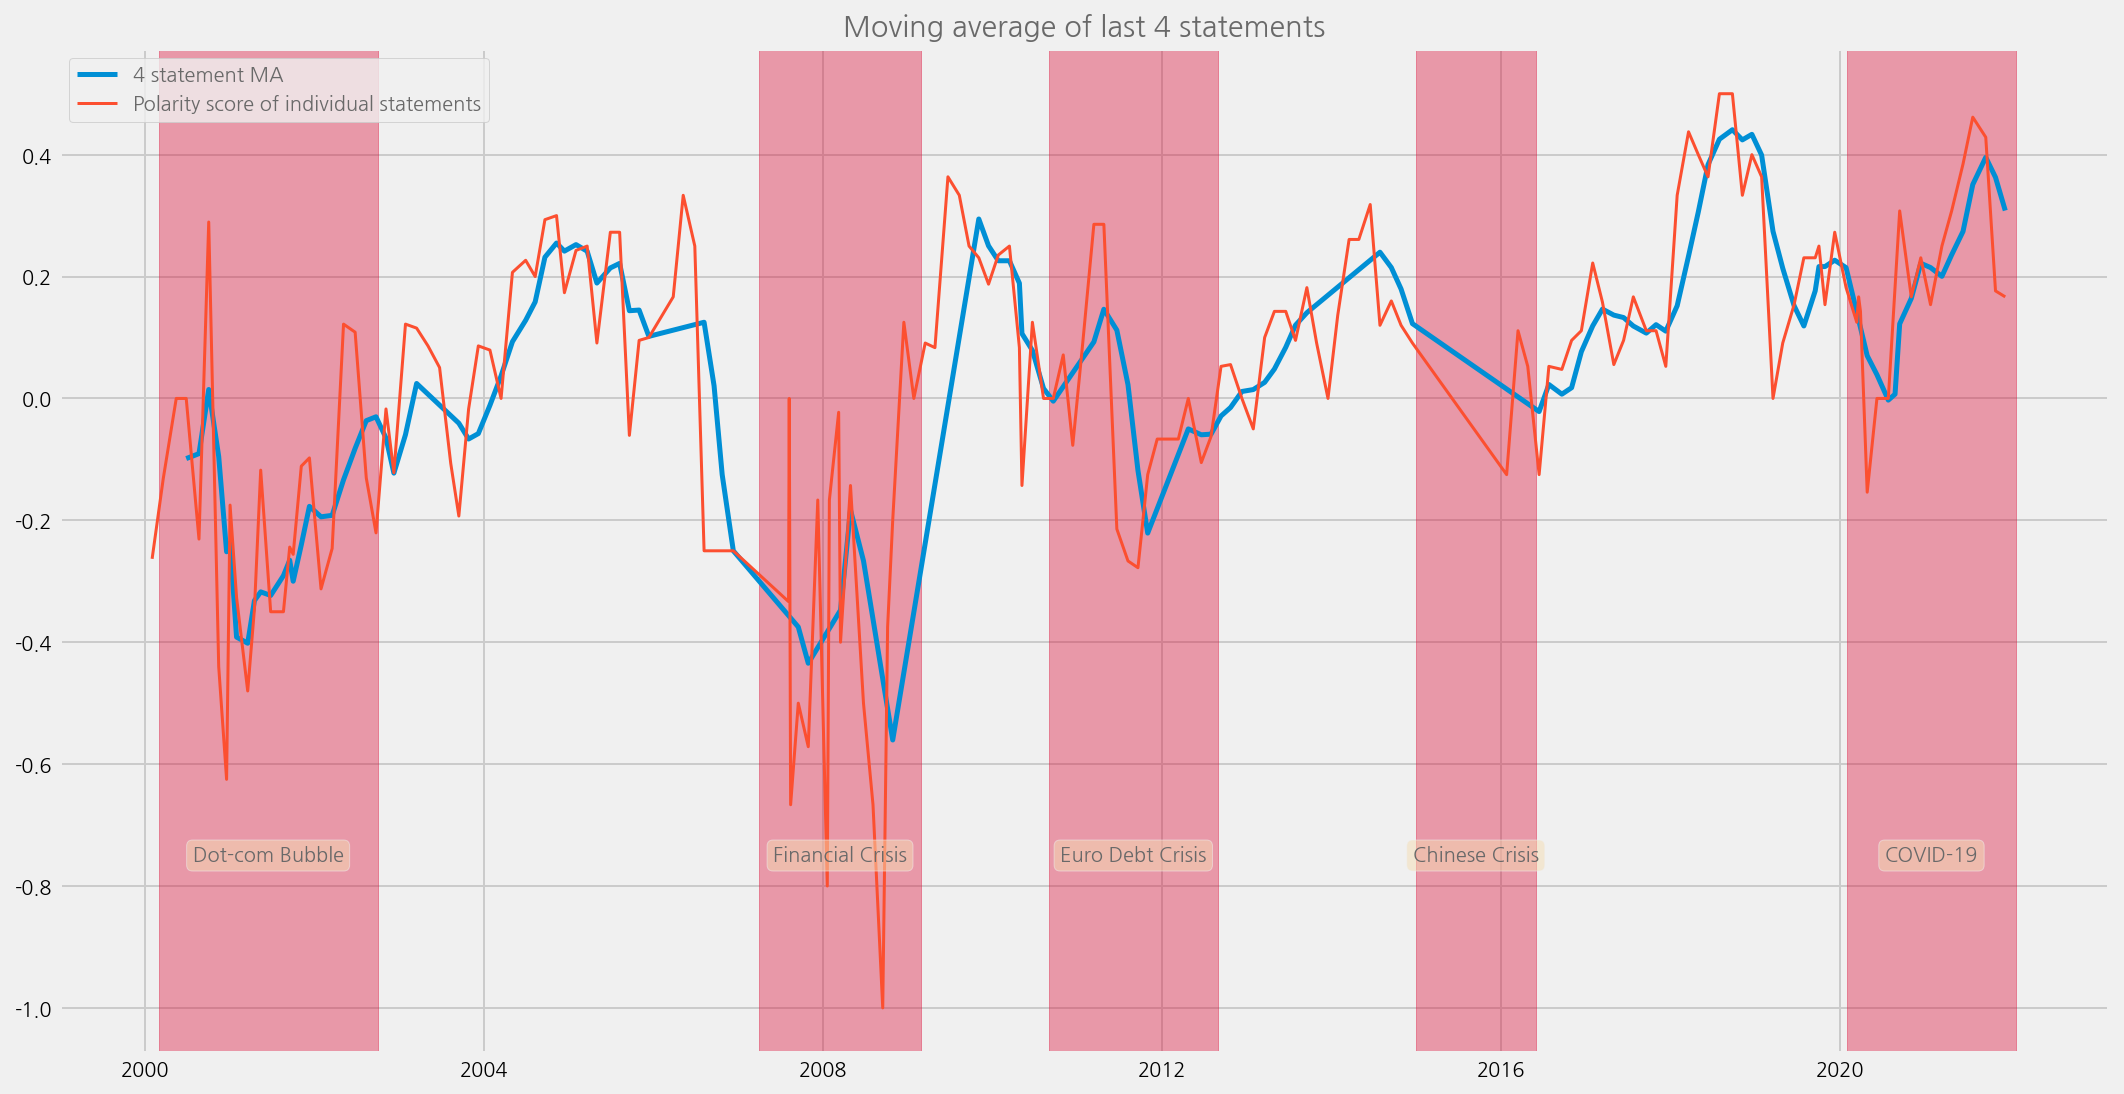

In [136]:
window = 4
merged_data_recent["polarity_ma"] = merged_data_recent['polarity_diffusion_statement'].rolling(window).mean()

cfg = eKonf.compose("visualize/plot=lineplot")
cfg.figure.figsize = (15, 8)
cfg.plot.x = "timestamp"
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "polarity_ma"
cfg.plots[0].linewidth = 2.5
cfg.plots[0].palette = "r"
cfg.plots[1].y = "polarity_diffusion_statement"
cfg.plots[1].linewidth = 1.5
cfg.plots[1].palette = "g"
cfg.ax.title = f"Moving average of last {window} statements"
cfg.ax.legend.labels = [
    f"{window} statement MA",
    "Polarity score of individual statements",
]
cfg.ax.axvspans = spans
cfg.ax.annotations = annotations
eKonf.instantiate(cfg, data=merged_data_recent)

INFO:ekorpkit.visualize.plot:Plotting lineplot with {'x': 'timestamp', 'y': 'polarity_minutes_ma', 'linewidth': 2.5, 'palette': 'r', 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.plot:Plotting lineplot with {'x': 'timestamp', 'y': 'polarity_diffusion_minutes', 'linewidth': 1.5, 'palette': 'g', 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize

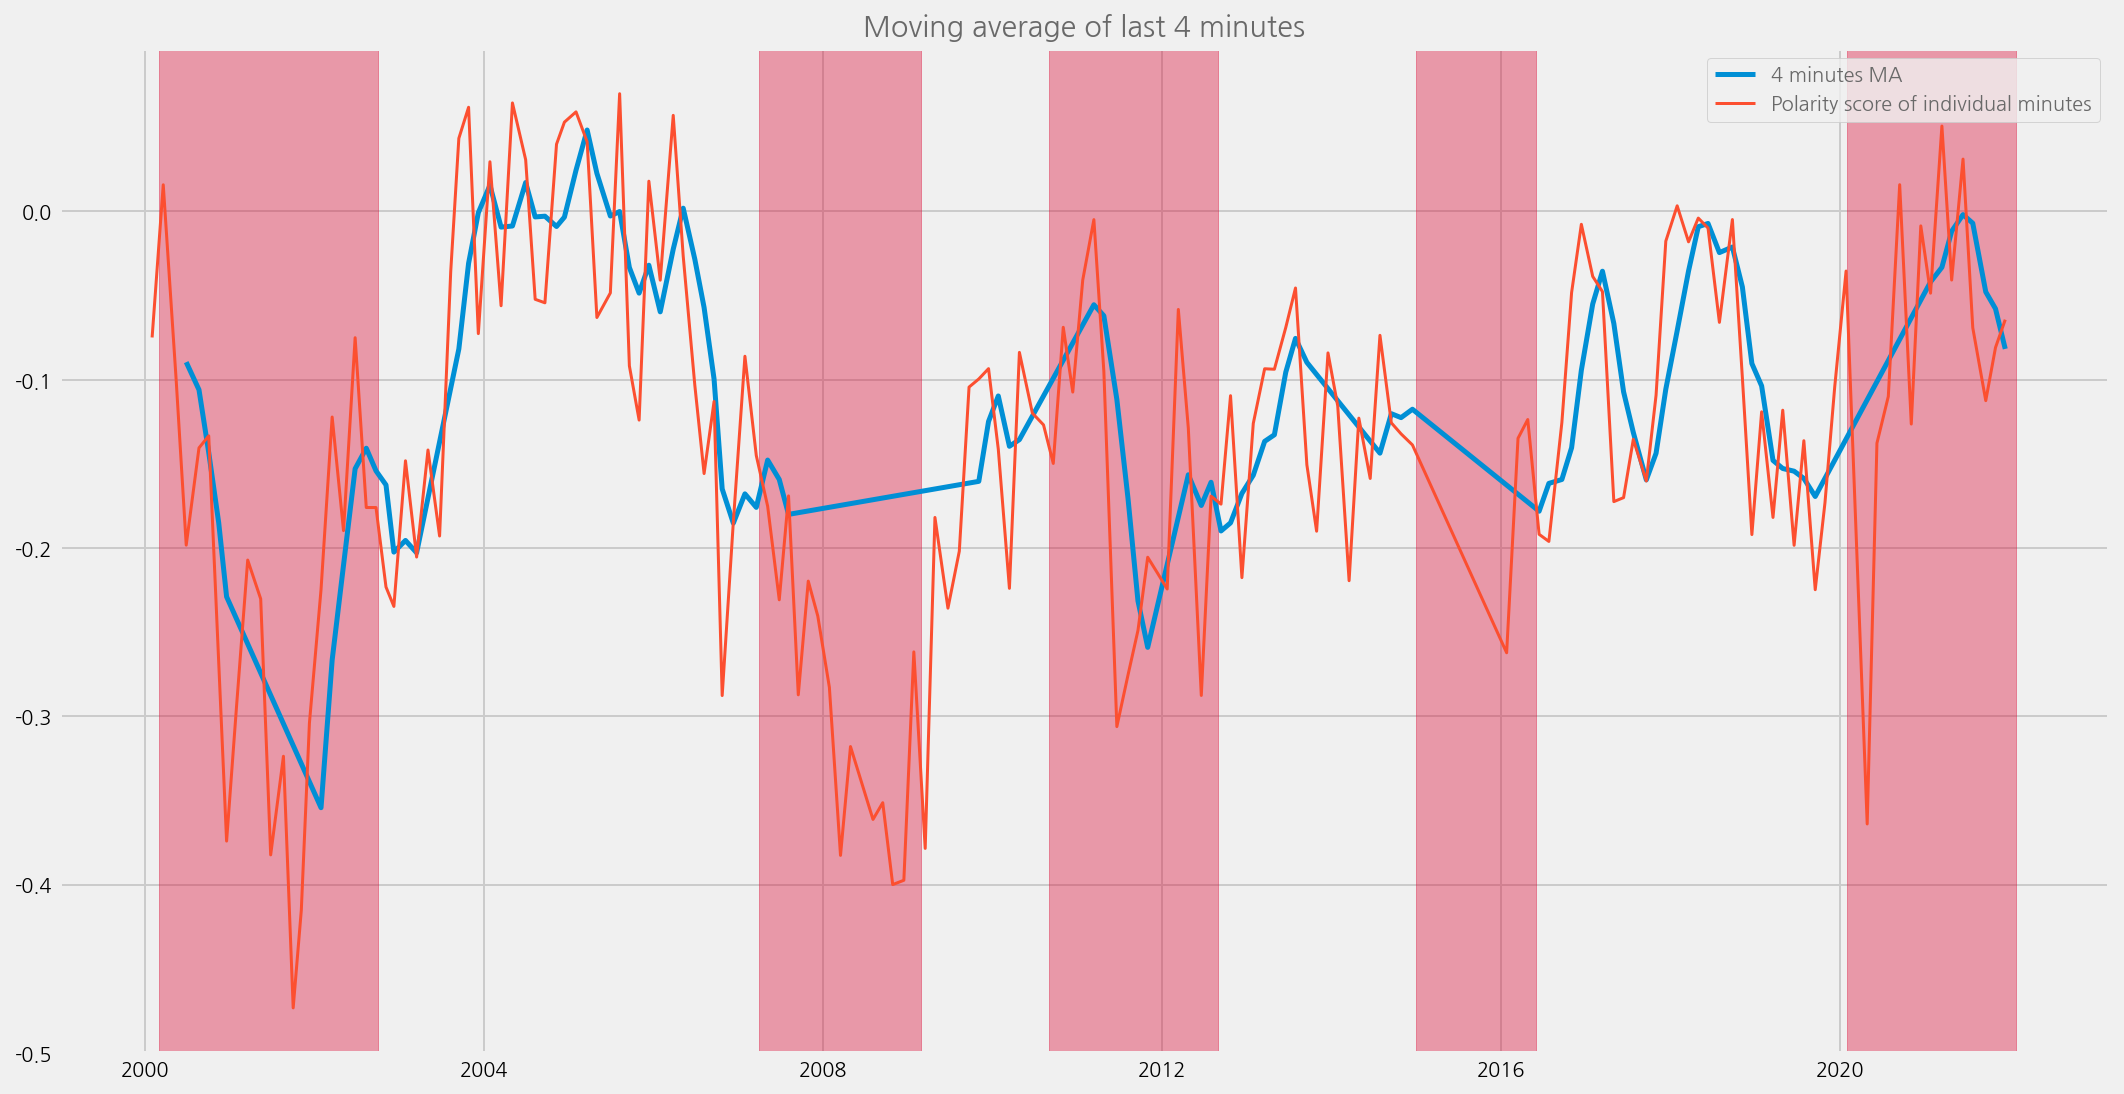

In [137]:
window = 4
merged_data_recent["polarity_minutes_ma"] = merged_data_recent['polarity_diffusion_minutes'].rolling(window).mean()

cfg = eKonf.compose("visualize/plot=lineplot")
cfg.figure.figsize = (15, 8)
cfg.plot.x = "timestamp"
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "polarity_minutes_ma"
cfg.plots[0].linewidth = 2.5
cfg.plots[0].palette = "r"
cfg.plots[1].y = "polarity_diffusion_minutes"
cfg.plots[1].linewidth = 1.5
cfg.plots[1].palette = "g"
cfg.ax.title = f"Moving average of last {window} minutes"
cfg.ax.legend.labels = [
    f"{window} minutes MA",
    "Polarity score of individual minutes",
]
cfg.ax.axvspans = spans
cfg.ax.annotations = annotations
eKonf.instantiate(cfg, data=merged_data_recent)

In [138]:
from datetime import datetime

chair = fomc.chairpersons
chair = chair[chair.to_date.dt.year >= start_year]
annot_args = eKonf.compose("visualize/plot/ax/annotation")

spans = []
annotations = []
for row in chair.iterrows():
    row_num = row[0]
    start = row[1]["from_date"]
    if start.year < start_year:
        start = datetime(2000, 1, 1)
    end = row[1]["to_date"]
    annotation = row[1]["last_name"]
    color = "crimson" if row_num % 2 == 0 else "darkblue"
    alpha = 0.4 if row_num % 2 == 0 else 0.2
    span = {
        "xmin": eKonf.to_dateparm(start),
        "xmax": eKonf.to_dateparm(end),
        "alpha": alpha,
        "color": color,
    }

    x = start + (end - start) / 2
    y = -0.75
    annot = annot_args.copy()
    annot.text, annot.x, annot.y = annotation, eKonf.to_dateparm(x), y

    spans.append(span)
    annotations.append(annot)


INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'color': 'red', 'x': 'timestamp', 'y': 'polarity_ma', 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'color': 'green', 'x': 'timestamp', 'y': 'polarity_diffusion_statement', 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': Non

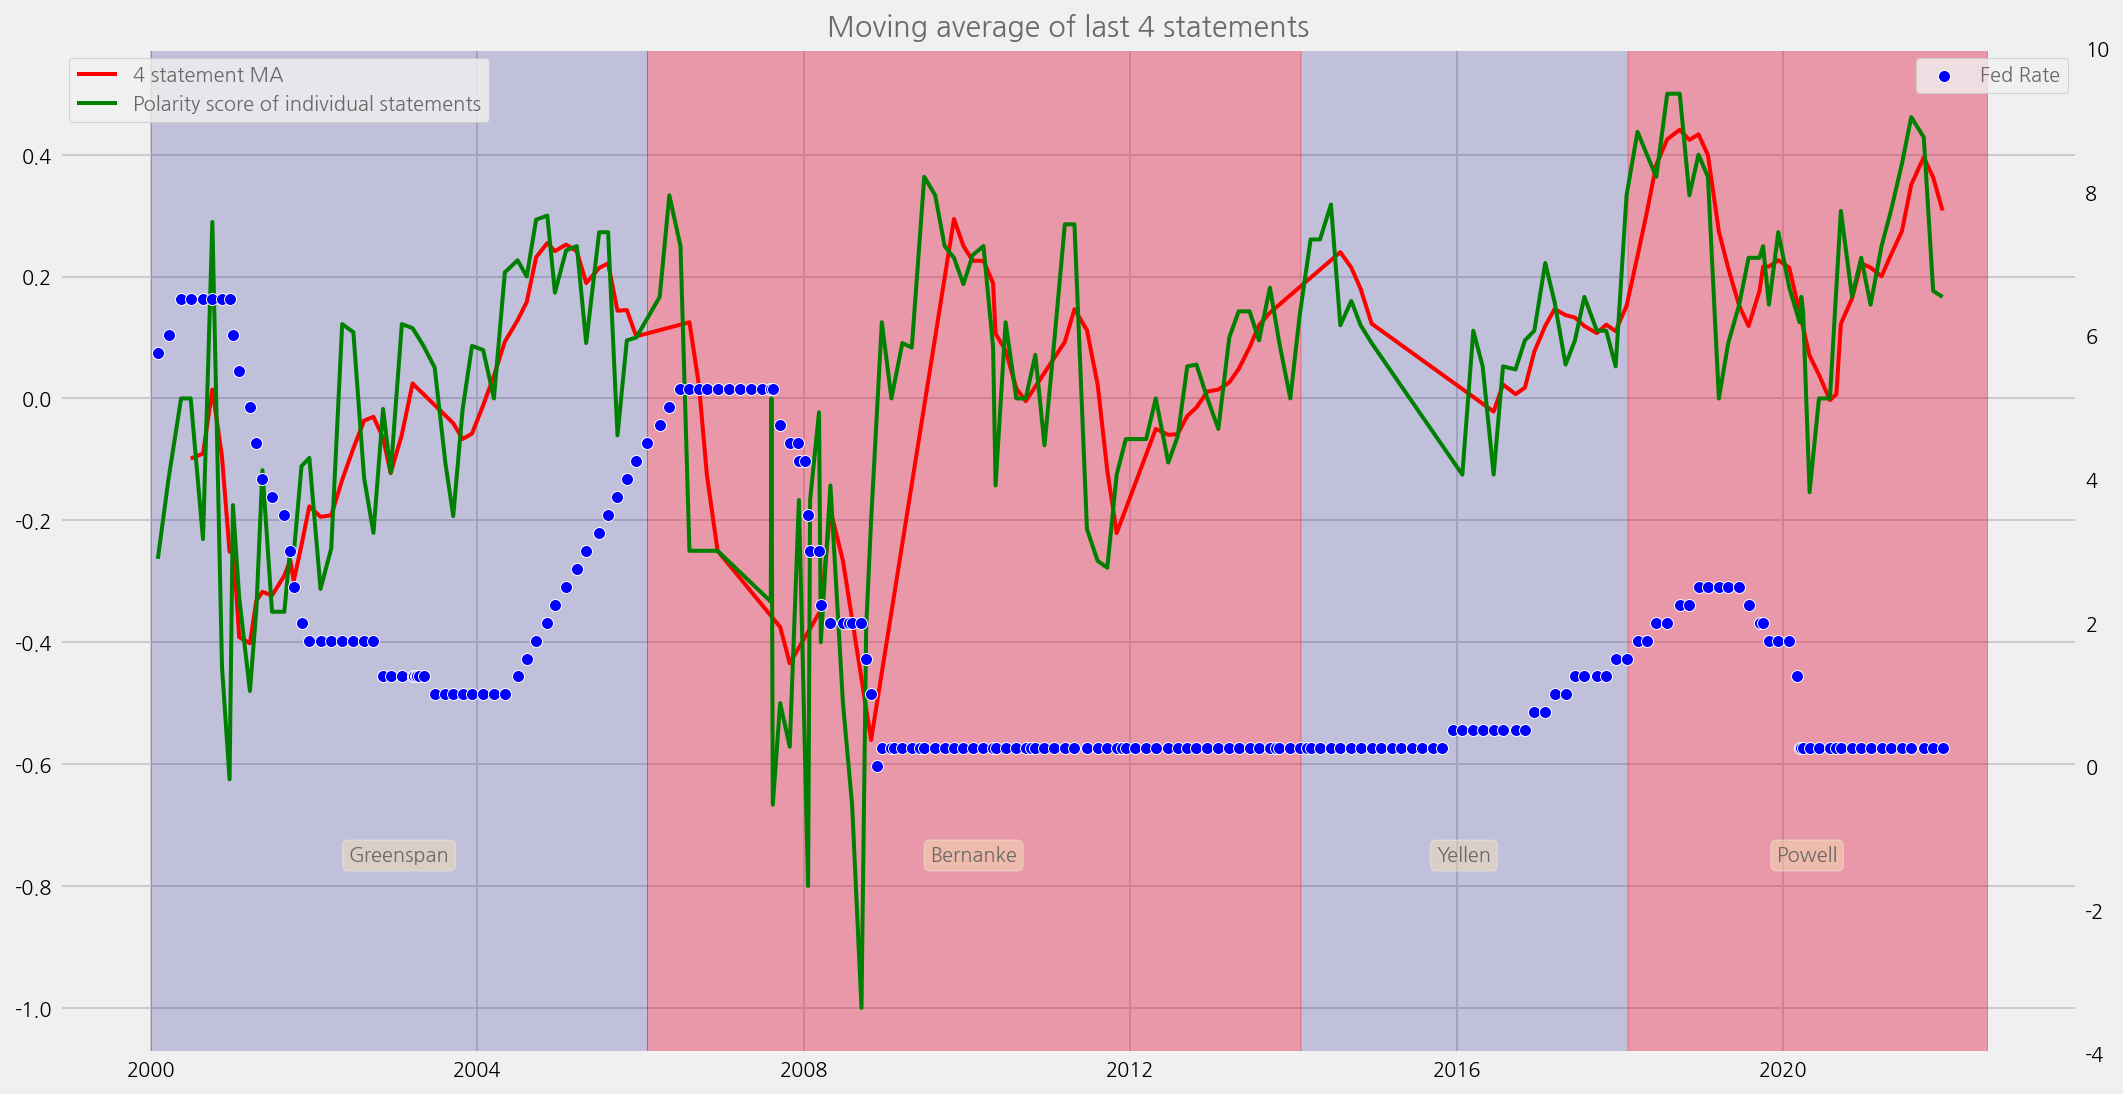

In [139]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plot.x = "timestamp"
ax2 = cfg.ax.copy()

cfg.figure.figsize = (15, 8)
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "polarity_ma"
cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
cfg.plots[1].y = "polarity_diffusion_statement"
cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
cfg.ax.title = f"Moving average of last {window} statements"
cfg.ax.legend = dict(
    labels=[
        f"{window} statement MA",
        "Polarity score of individual statements",
    ],
    loc=2,
)
scatter_cfg = eKonf.compose("visualize/plot/scatterplot")
scatter_cfg.y = "rate"
scatter_cfg.secondary_y = True
scatter_cfg.rcParams = dict(color="blue", alpha=0.8)
cfg.plots.append(scatter_cfg)

ax2.grid = False
ax2.secondary_y = True
ax2.ylim = "(-4, 10)"
ax2.legend = dict(
    labels=["Fed Rate"],
    loc=1,
)
cfg.axes.append(ax2)
cfg.ax.axvspans = spans
cfg.ax.annotations = annotations

eKonf.instantiate(cfg, data=merged_data_recent)


INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'color': 'red', 'x': 'timestamp', 'y': 'polarity_minutes_ma', 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle': None}
INFO:ekorpkit.visualize.plot:Plotting lineplot with {'linewidth': 2, 'color': 'green', 'x': 'timestamp', 'y': 'polarity_diffusion_minutes', 'palette': None, 'hue': None, 'size': None, 'style': None, 'hue_order': None, 'hue_norm': None, 'sizes': None, 'size_order': None, 'size_norm': None, 'dashes': True, 'markers': None, 'style_order': None, 'units': None, 'estimator': 'mean', 'ci': 95, 'n_boot': 1000, 'seed': None, 'sort': True, 'err_style': 'band', 'err_kws': None, 'legend': 'auto', 'drawstyle

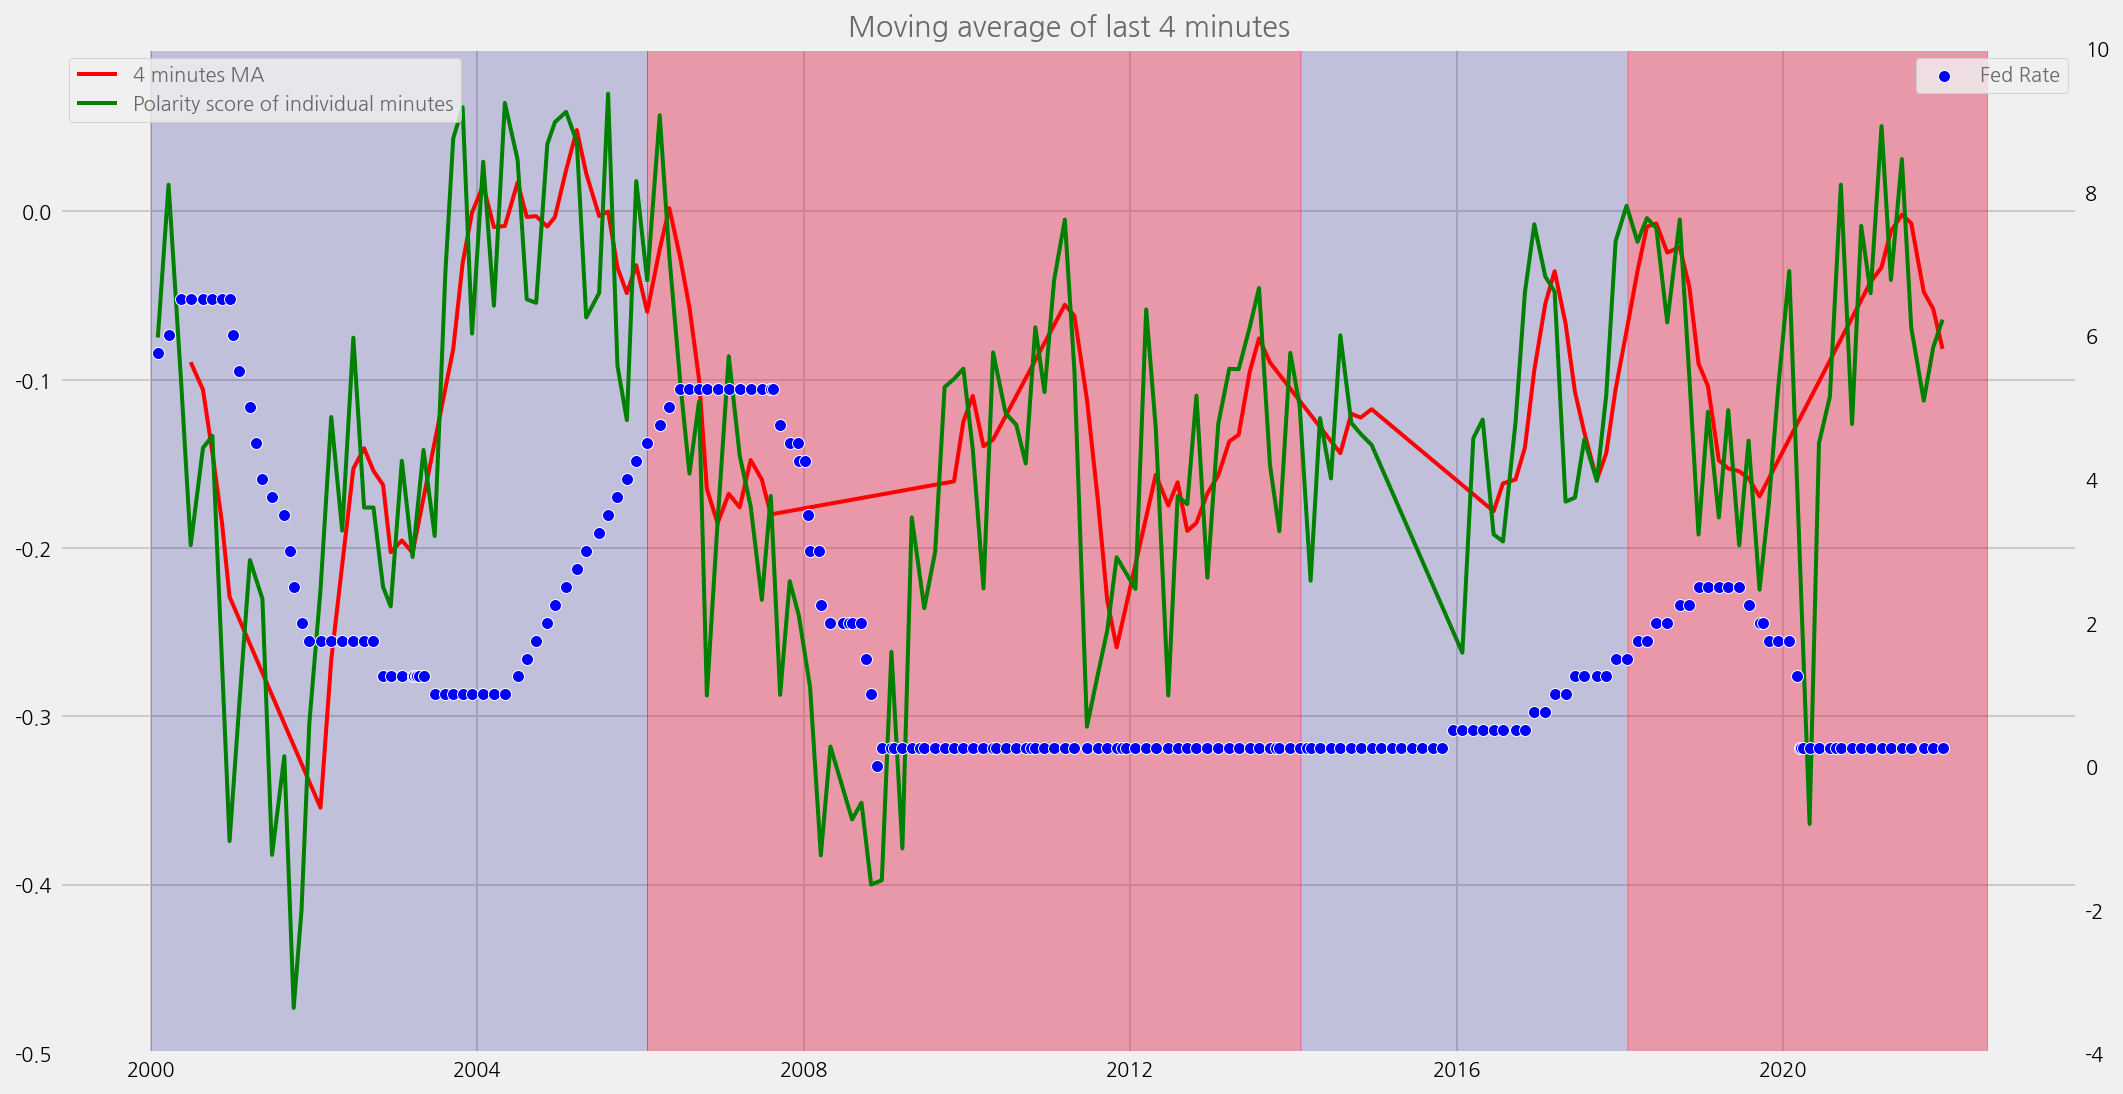

In [140]:
cfg = eKonf.compose("visualize/plot=lineplot")
cfg.plot.x = "timestamp"
ax2 = cfg.ax.copy()

cfg.figure.figsize = (15, 8)
cfg.plots.append(cfg.plot.copy())
cfg.plots[0].y = "polarity_minutes_ma"
cfg.plots[0].rcParams = dict(linewidth=2.5, color="red")
cfg.plots[1].y = "polarity_diffusion_minutes"
cfg.plots[1].rcParams = dict(linewidth=1.5, color="green")
cfg.ax.title = f"Moving average of last {window} minutes"
cfg.ax.legend = dict(
    labels=[
        f"{window} minutes MA",
        "Polarity score of individual minutes",
    ],
    loc=2,
)
scatter_cfg = eKonf.compose("visualize/plot/scatterplot")
scatter_cfg.y = "rate"
scatter_cfg.secondary_y = True
scatter_cfg.rcParams = dict(color="blue", alpha=0.8)
cfg.plots.append(scatter_cfg)

ax2.grid = False
ax2.secondary_y = True
ax2.ylim = "(-4, 10)"
ax2.legend = dict(
    labels=["Fed Rate"],
    loc=1,
)
cfg.axes.append(ax2)
cfg.ax.axvspans = spans
cfg.ax.annotations = annotations

eKonf.instantiate(cfg, data=merged_data_recent)
